In [1]:
!pip install optuna
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00





# 1 | Importing Required Libraries & DataSource




In [2]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

#for hypertuning
import optuna

# Machine Learning Algorithms
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    ExtraTreesClassifier
)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib

# Library for Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Data Source
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))




# Load and Inspect Dataset




In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
original_df = pd.read_csv('data.csv', sep=';')

In [4]:
train_df.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           126.0            1                       1   
1                           125.0            1                      19   
2                           137.0            1                       3   
3                           131.0            1                      19   
4                           132.0            1                      19   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      19                    5                    5   
1                      19                    9                    9   
2                      19                    2                    3   
3                       3                    3                    2   
4                      37                    4                    9   

   Admission grade  Displaced  Educational special needs  Debtor  \
0            122.6          0                          0       0   
1            119.8          1                          0       0   
2            144.7          0                          0       0   
3            126.1          1                          0       0   
4            120.1          1                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       0                   1                 18   
1                        1       0                   0                 18   
2                        1       1                   0                 18   
3                        1       0                   1                 18   
4                        1       0                   0                 18   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    7   
4                                    7   

   Curricular units 1st sem (evaluations)  \
0                                       6   
1                                       8   
2                                       0   
3                                       9   
4                                      12   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    6                         14.500000   
1                                    4                         11.600000   
2                                    0                          0.000000   
3                                    7                         12.591250   
4                                    6                         12.933333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2           

In [5]:
original_df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      12                    5                    9   
1                       3                    3                    3   
2                      37                    9                    9   
3                      37                    5                    3   
4                      38                    9                    9   

   Admission grade  Displaced  Educational special needs  Debtor  \
0            127.3          1                          0       0   
1            142.5          1                          0       0   
2            124.8          1                          0       0   
3            119.6          1                          0       0   
4            141.5          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                       

In [6]:
test_df.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           141.0            1                       3   
1                           128.0            1                       1   
2                           118.0            1                       1   
3                           130.0            1                       1   
4                           110.0            1                       1   

   Father's qualification  Mother's occupation  Father's occupation  \
0                       1                    2                    3   
1                      19                    4                    5   
2                      19                    4                    9   
3                      19                    3                    3   
4                      37                    5                    5   

   Admission grade  Displaced  Educational special needs  Debtor  \
0            152.1          0                          0       0   
1            116.5          0                          0       0   
2            114.2          0                          0       0   
3            130.0          0                          0       0   
4            106.0          1                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        0       0                   0                 18   
1                        1       0                   0                 19   
2                        1       0                   1                 18   
3                        1       0                   1                 23   
4                        1       0                   0                 26   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    2   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    7   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       7   
2                                      11   
3                                      15   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.857143   
2                                    6                         12.000000   
3                                    5                         11.500000   
4                                    3                         11.000000   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0 

In [7]:
print("train_df columns:", train_df.columns)
print('-'* 80)
print("original_df columns:", original_df.columns)


train_df columns: Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
      

In [8]:
# Standardize column names by stripping leading/trailing spaces
train_df.columns = train_df.columns.str.strip()
original_df.columns = original_df.columns.str.strip()

In [9]:
# Find differences in columns
train_columns = set(train_df.columns)
original_columns = set(original_df.columns)

In [10]:
# Columns in train_df but not in original_df
only_in_train = train_columns - original_columns
only_in_train

{'id'}

In [11]:
# Columns in original_df but not in train_df
only_in_original = original_columns - train_columns
only_in_original

set()

## Description of the features in the student success dataset features:

1. **id**: Unique identifier for each student.
2. **Marital status**: Marital status of the student (e.g., single, married).
3. **Application mode**: Mode of application (e.g., online, offline).
4. **Application order**: Order in which the application was submitted.
5. **Course**: The course in which the student is enrolled.
6. **Daytime/evening attendance**: Whether the student attends classes during the day or evening.
7. **Previous qualification**: The previous qualification level of the student (e.g., high school, diploma).
8. **Previous qualification (grade)**: Grade achieved in the previous qualification.
9. **Nacionality**: Nationality of the student.
10. **Mother's qualification**: Educational qualification of the student's mother.
11. **Father's qualification**: Educational qualification of the student's father.
12. **Mother's occupation**: Occupation of the student's mother.
13. **Father's occupation**: Occupation of the student's father.
14. **Admission grade**: Grade achieved at the time of admission.
15. **Displaced**: Whether the student has been displaced from their original place of residence.
16. **Educational special needs**: Whether the student has any special educational needs.
17. **Debtor**: Whether the student has any outstanding debts.
18. **Tuition fees up to date**: Whether the student's tuition fees are up to date.
19. **Gender**: Gender of the student (e.g., male, female, non-binary).
20. **Scholarship holder**: Whether the student is a scholarship holder.
21. **Age at enrollment**: Age of the student at the time of enrollment.
22. **International**: Whether the student is an international student.
23. **Curricular units 1st sem (credited)**: Number of curricular units credited in the first semester.
24. **Curricular units 1st sem (enrolled)**: Number of curricular units enrolled in the first semester.
25. **Curricular units 1st sem (evaluations)**: Number of evaluations in the first semester.
26. **Curricular units 1st sem (approved)**: Number of curricular units approved in the first semester.
27. **Curricular units 1st sem (grade)**: Grade of the curricular units in the first semester.
28. **Curricular units 1st sem (without evaluations)**: Number of curricular units without evaluations in the first semester.
29. **Curricular units 2nd sem (credited)**: Number of curricular units credited in the second semester.
30. **Curricular units 2nd sem (enrolled)**: Number of curricular units enrolled in the second semester.
31. **Curricular units 2nd sem (evaluations)**: Number of evaluations in the second semester.
32. **Curricular units 2nd sem (approved)**: Number of curricular units approved in the second semester.
33. **Curricular units 2nd sem (grade)**: Grade of the curricular units in the second semester.
34. **Curricular units 2nd sem (without evaluations)**: Number of curricular units without evaluations in the second semester.
35. **Unemployment rate**: Unemployment rate at the time of enrollment.
36. **Inflation rate**: Inflation rate at the time of enrollment.
37. **GDP**: Gross Domestic Product at the time of enrollment.
38. **Target**: The target variable indicating the success of the student (e.g., binary outcome such as success or failure).m

Understanding these features and the target variable is crucial for building predictive models and designing effective student success prediction.

=>


# 2 | Data Exploration




<a id='2.1'></a>
#### 2.1. Computing Dimension of Dataset

In [12]:
print("dataset shape: ",train_df.shape)

dataset shape:  (76518, 38)


In [13]:
#print("dataset shape: ",original_df.shape)

In [14]:
print("dataset shape: ",test_df.shape)

dataset shape:  (51012, 37)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **76518 records** and **38 columns** availabe in the train_dataset.
* There is total **51012 records** and **37 columns** availabe in the test_dataset.

In [15]:
# train_df = pd.concat([train_df,original_df],axis = 0)
#train_df

In [16]:
# after concating the shape of df
print("dataset shape: ",train_df.shape)

dataset shape:  (76518, 38)


<a id='2.2'></a>
#### 2.2. Statistical Summary of Dataset

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [18]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 37 Numerical Columns in dataset
There are 1 Categorical Columns in dataset


<a id='2.3'></a>
#### 2.3. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [19]:
# saving id to use for submission work at end
id = test_df['id']

In [20]:
cols = ["id"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

<a id='2.4'></a>
#### 2.4. Checking if There's Any Duplicate Records.

In [21]:
print("Duplicates in Dataset: ",train_df.duplicated().sum())

Duplicates in Dataset:  0


<a id='2.5'></a>
#### 2.5. Computing Total No. of Missing Values and the Percentage of Missing Values

In [22]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

Total No. of Missing Values  \
Marital status                                                            0   
Application mode                                                          0   
Application order                                                         0   
Course                                                                    0   
Daytime/evening attendance                                                0   
Previous qualification                                                    0   
Previous qualification (grade)                                            0   
Nacionality                                                               0   
Mother's qualification                                                    0   
Father's qualification                                                    0   
Mother's occupation                                                       0   
Father's occupation                                                       0   
Admission grade                                                           0   
Displaced                                                                 0   
Educational special needs                                                 0   
Debtor                                                                    0   
Tuition fees up to date                                                   0   
Gender                                                                    0   
Scholarship holder                                                        0   
Age at enrollment                                                         0   
International                                                             0   
Curricular units 1st sem (credited)                                       0   
Curricular units 1st sem (enrolled)                                       0   
Curricular units 1st sem (evaluations)                                    0   
Curricular units 1st sem (approved)                                       0   
Curricular units 1st sem (grade)                                          0   
Curricular units 1st sem (without evaluations)                            0   
Curricular units 2nd sem (credited)                                       0   
Curricular units 2nd sem (enrolled)                                       0   
Curricular units 2nd sem (evaluations)                                    0   
Curricular units 2nd sem (approved)                                       0   
Curricular units 2nd sem (grade)                                          0   
Curricular units 2nd sem (without evaluations)                            0   
Unemployment rate                                                         0   
Inflation rate                                                            0   
GDP                                                                       0   
Target                                                                    0   

                                                % of Missing Values  
Marital status                                                  0.0  
Application mode                                                0.0  
Application order                                               0.0  
Course                                                          0.0  
Daytime/evening attendance                                      0.0  
Previous qualification                                          0.0  
Previous qualification (grade)                                  0.0  
Nacionality                                                     0.0  
Mother's qualification                                          0.0  
Father's qualification                                          0.0  
Mother's occupation                                             0.0  
Father's occupation                                             0.0  
Admission grade                                                 0.0  
Displaced                                                       0



* None of the Attribute are having Missing Values.  

<a id='2.6'></a>
#### 2.6. Performing Descriptive Analysis

In [23]:
round(train_df.describe().T,2)

count     mean      std  \
Marital status                                  76518.0     1.11     0.44   
Application mode                                76518.0    16.05    16.68   
Application order                               76518.0     1.64     1.23   
Course                                          76518.0  9001.29  1803.44   
Daytime/evening attendance                      76518.0     0.92     0.28   
Previous qualification                          76518.0     3.66     8.62   
Previous qualification (grade)                  76518.0   132.38    11.00   
Nacionality                                     76518.0     1.23     3.39   
Mother's qualification                          76518.0    19.84    15.40   
Father's qualification                          76518.0    23.43    14.92   
Mother's occupation                             76518.0     8.58    17.47   
Father's occupation                             76518.0     8.88    16.80   
Admission grade                                 76518.0   125.36    12.56   
Displaced                                       76518.0     0.57     0.50   
Educational special needs                       76518.0     0.00     0.06   
Debtor                                          76518.0     0.07     0.26   
Tuition fees up to date                         76518.0     0.89     0.31   
Gender                                          76518.0     0.32     0.46   
Scholarship holder                              76518.0     0.25     0.43   
Age at enrollment                               76518.0    22.28     6.89   
International                                   76518.0     0.01     0.08   
Curricular units 1st sem (credited)             76518.0     0.19     1.18   
Curricular units 1st sem (enrolled)             76518.0     5.89     1.67   
Curricular units 1st sem (evaluations)          76518.0     7.35     3.51   
Curricular units 1st sem (approved)             76518.0     4.18     2.69   
Curricular units 1st sem (grade)                76518.0    10.00     5.26   
Curricular units 1st sem (without evaluations)  76518.0     0.06     0.41   
Curricular units 2nd sem (credited)             76518.0     0.14     0.93   
Curricular units 2nd sem (enrolled)             76518.0     5.93     1.63   
Curricular units 2nd sem (evaluations)          76518.0     7.23     3.50   
Curricular units 2nd sem (approved)             76518.0     4.01     2.77   
Curricular units 2nd sem (grade)                76518.0     9.63     5.55   
Curricular units 2nd sem (without evaluations)  76518.0     0.06     0.46   
Unemployment rate                               76518.0    11.52     2.65   
Inflation rate                                  76518.0     1.23     1.40   
GDP                                             76518.0    -0.08     2.25   

                                                  min      25%      50%  \
Marital status                                   1.00     1.00     1.00   
Application mode                                 1.00     1.00    17.00   
Application order                                0.00     1.00     1.00   
Course                                          33.00  9119.00  9254.00   
Daytime/evening attendance                       0.00     1.00     1.00   
Previous qualification                           1.00     1.00     1.00   
Previous qualification (grade)                  95.00   125.00   133.10   
Nacionality                                      1.00     1.00     1.00   
Mother's qualification                           1.00     1.00    19.00   
Father's qualification                           1.00     4.00    19.00   
Mother's occupation                              0.00     4.00     7.00   
Father's occupation                              0.00     5.00     7.00   
Admission grade                                 95.00   118.00   124.60   
Displaced                                        0.00     0.00     1.00   
Educational special needs                        0.00     0.00     0.00   


<a id='2.7'></a>
## **7. Checking Unique Values of Categorical Attributes.**

In [24]:
# Checking Unique entries in Train_df
cat_cols = train_df.select_dtypes(include="object").columns

for column in cat_cols:
    print('Unique values of ', column, set(train_df[column]))


Unique values of  Target {'Graduate', 'Enrolled', 'Dropout'}



# 3 | Exploratory Data Analysis (EDA)



<a id='3.1'></a>
## **1. Checking for outliers**

In [25]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

36

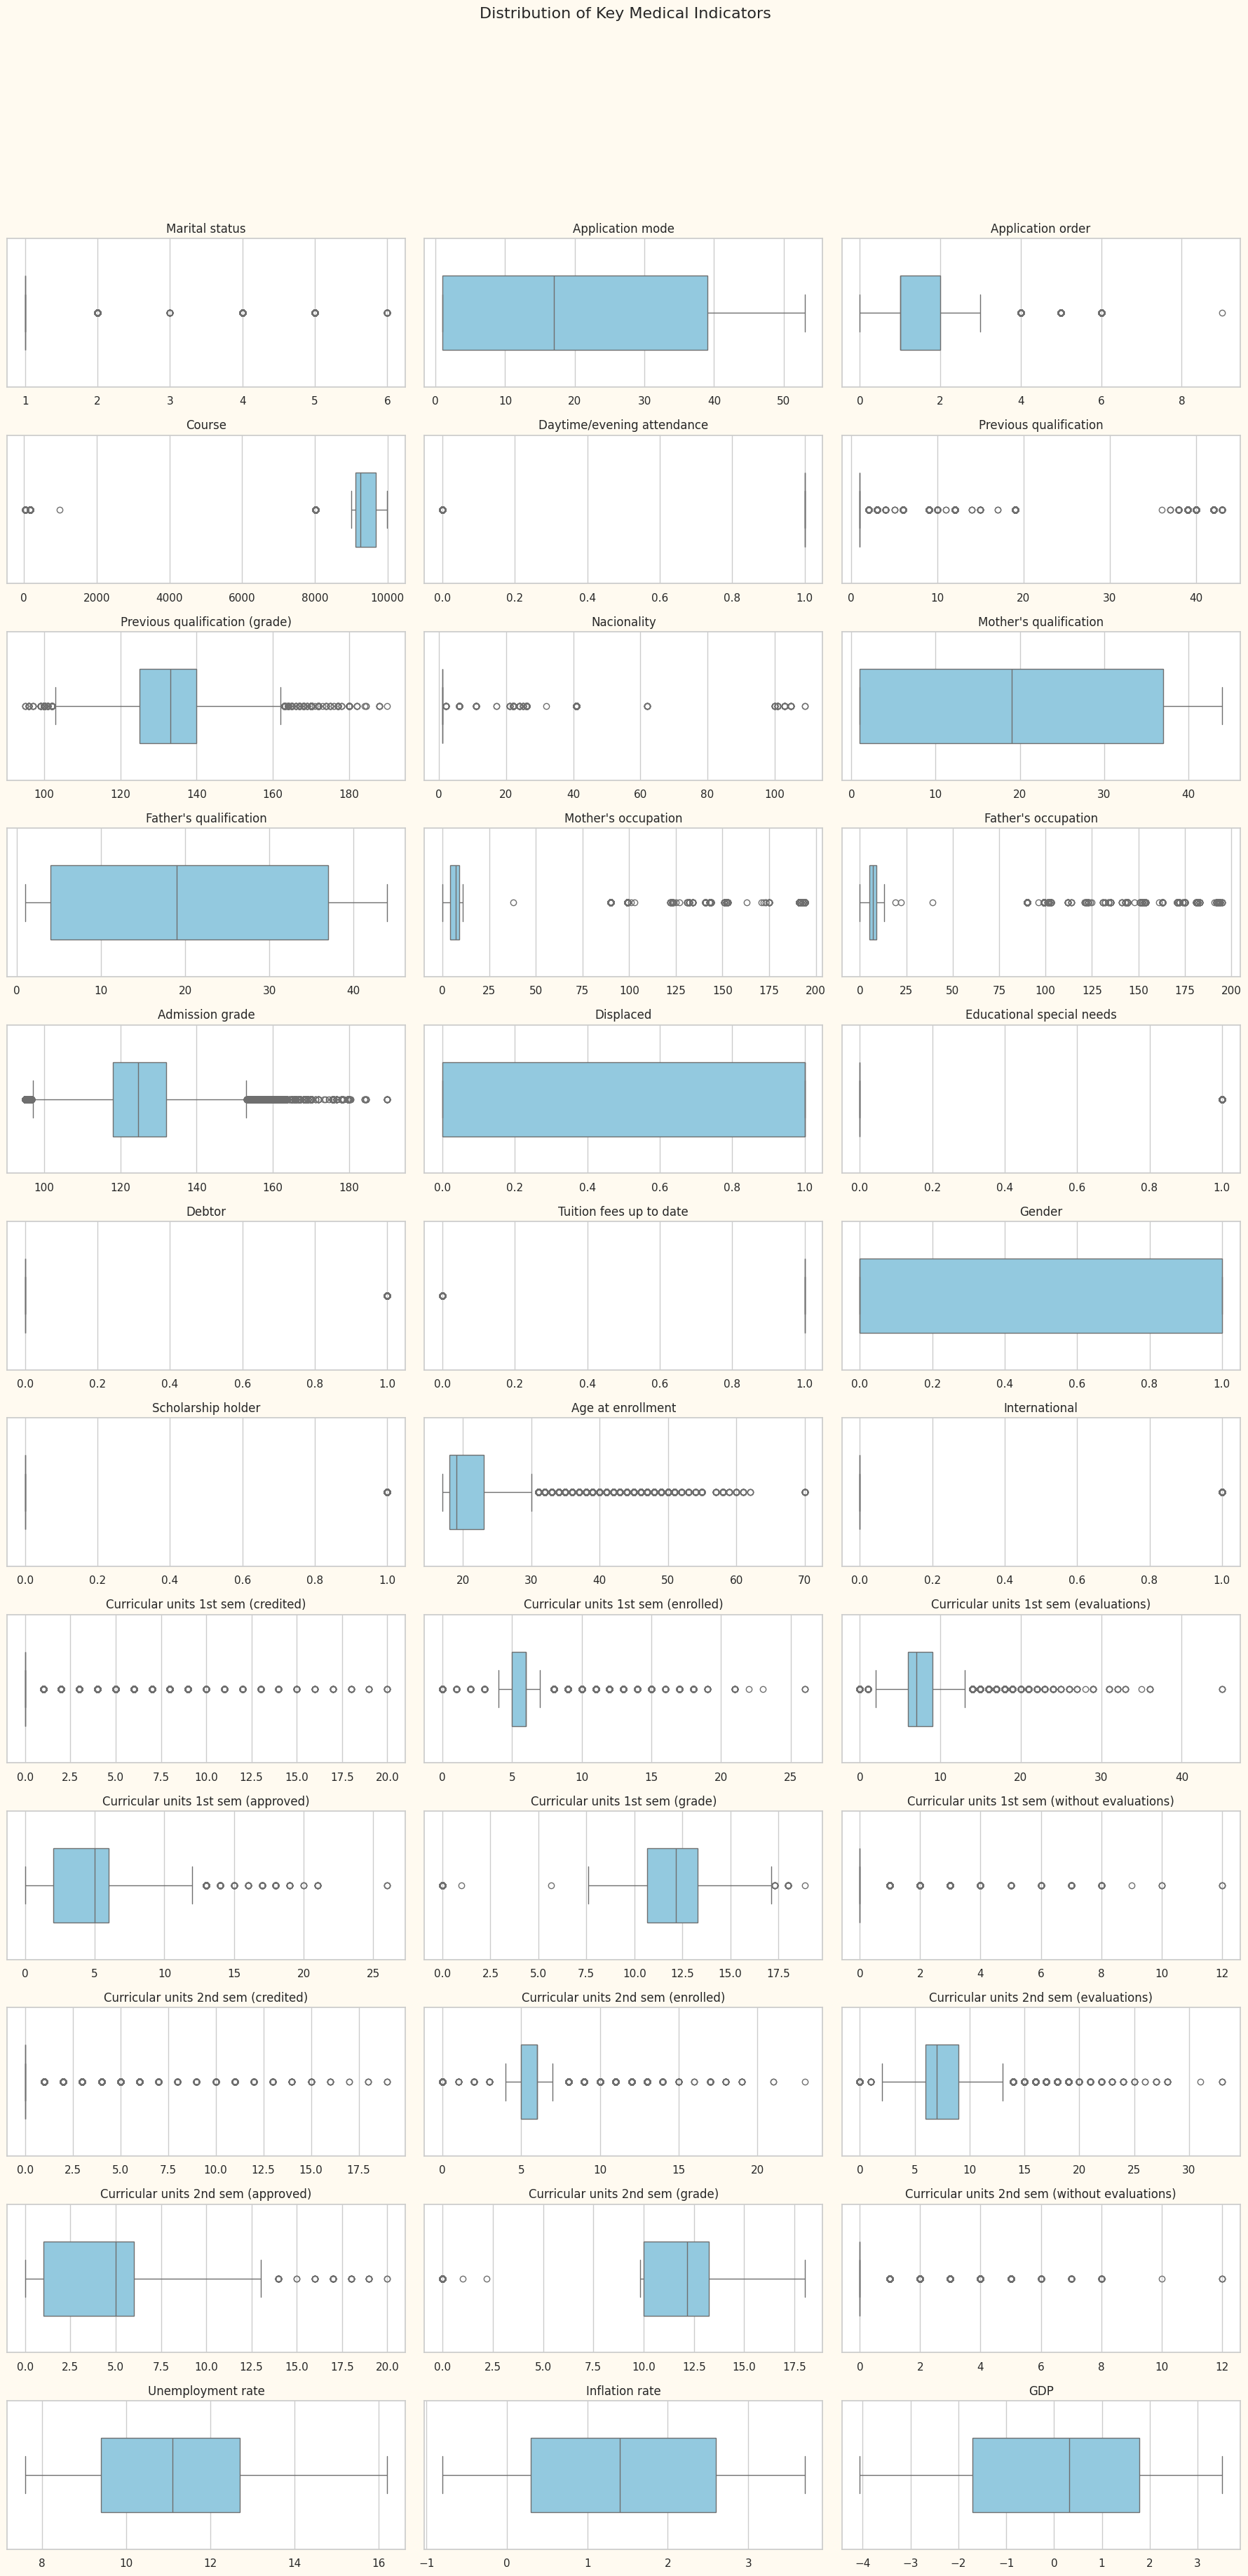

In [26]:
import math

# Number of numerical columns
num_columns = len(test_df.columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<a id='3.2'></a>
## **2. Visualising Data Distribution and Skewness**

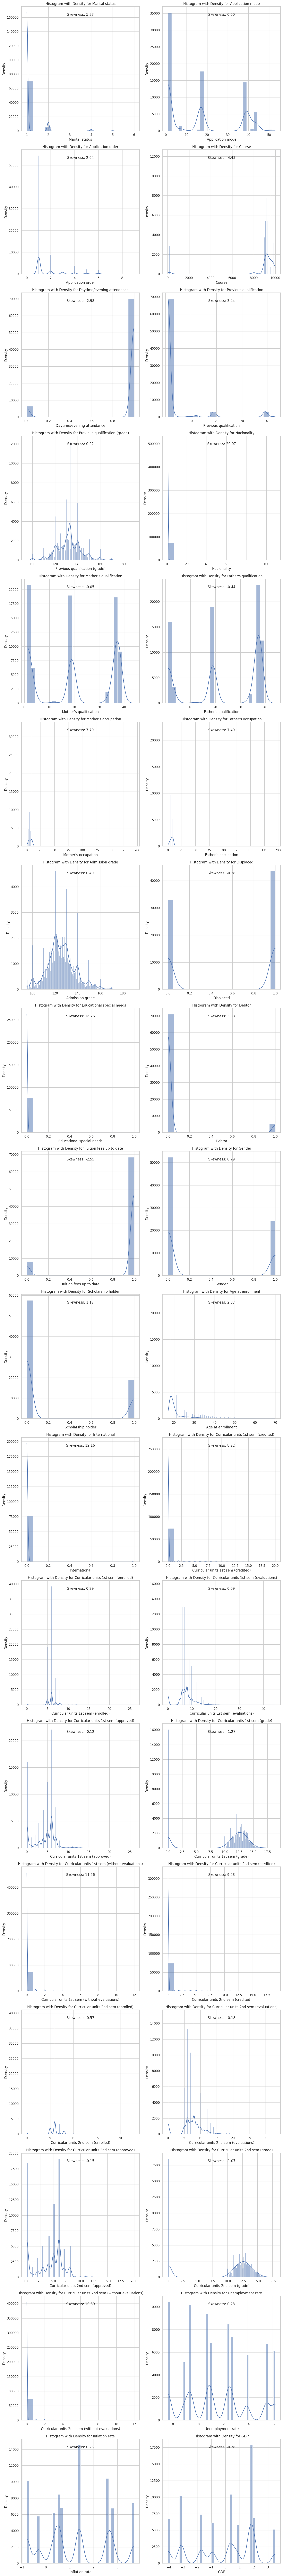

In [27]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


- |Skewness| < 1: The distribution is approximately symmetric.
- |Skewness| > 1: The distribution is highly skewed.
- |Skewness| between 1 and 2: Moderately skewed distribution.

<a id='3.3'></a>
## **3. Visualising Class Distribution**

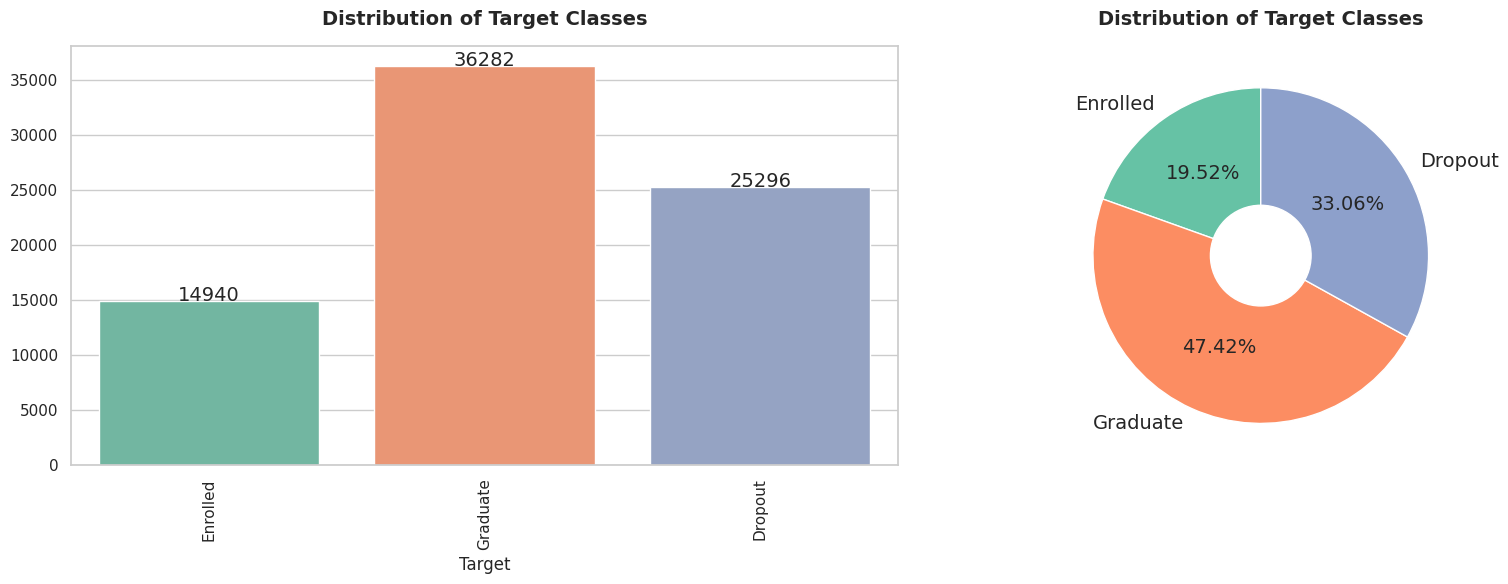

In [28]:

# Unique values of Target for multiclass
classes = ['Enrolled', 'Graduate', 'Dropout']

# Visualization to show distribution of Target classes in counts
plt.figure(figsize=(17, 6))

# Subplot 1: Bar plot of target class counts
plt.subplot(1, 2, 1)
Target_counts = train_df["Target"].value_counts().reindex(classes)
sns.barplot(x=Target_counts.index, y=Target_counts.values, palette='Set2')
plt.title("Distribution of Target Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(Target_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)

# Subplot 2: Pie chart of target class distribution
plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(classes))
plt.pie(Target_counts, labels=classes, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of Target Classes", fontweight="black", size=14, pad=15)

plt.tight_layout()
plt.show()


# 4 | Preprocessing



<a id='4.1'></a>
## **1. Featutre Engineering**

In [29]:
numerical_columns = test_df.columns

In [30]:
def generate_features(df):
    # Create new features
    df['units failed 1'] = df['Curricular units 1st sem (enrolled)'] - df['Curricular units 1st sem (approved)']
    df['mean'] = df[numerical_columns].mean(axis=1).round(2)

    quartiles = df[numerical_columns].quantile([0.25, 0.5, 0.75], axis=1)
    df['second_quartile'] = quartiles.loc[0.5]
    df['third_quartile'] = quartiles.loc[0.75]

    #original_cols = list(X.columns)
    df['Inflation_GDP_ratio'] = df['Inflation rate'] / df['GDP']
    df['Unemployment_GDP_ratio'] = df['Unemployment rate'] / df['GDP']
    df['GDP_inflation_interaction'] = df['GDP'] * df['Inflation rate']
    return df

In [31]:
generate_features(train_df)

Marital status  Application mode  Application order  Course  \
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       Father's qualification  Mother's occupation  Father's occupation  \
0                          19                    5                    5   
1                          19                    9                    9   
2                          19                    2                    3   
3                           3                    3                    2   
4                          37                    4                    9   
...                       ...                  ...                  ...   
76513                       1                    7                    5   
76514                      38                    4                    9   
76515                      37                    9                   10   
76516                      37                    5                    9   
76517                      19                    4                    9   

       Admission grade  Displaced  Educational special needs  Debtor  \
0                122.6          0                          0       0   
1                119.8          1                          0       0   
2                144.7          0                          0       0   
3                126.1          1                          0       0   
4                120.1          1                          0       0   
...                ...        ...                        ...     ...   
76513            116.5          1                          0       0   
76514            13

In [32]:
generate_features(test_df)

Marital status  Application mode  Application order  Course  \
0                   1                 1                  1    9500   
1                   1                 1                  1    9238   
2                   1                 1                  1    9238   
3                   1                44                  1    9147   
4                   1                39                  1    9670   
...               ...               ...                ...     ...   
51007               1                 1                  2     171   
51008               2                39                  1    9119   
51009               1                 1                  1     171   
51010               1                 1                  3    9773   
51011               1                 1                  1     171   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
51007                           1                       1   
51008                           1                      19   
51009                           1                       1   
51010                           1                       1   
51011                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
51007                           128.0            1                      38   
51008                           133.1            1                      19   
51009                           127.0            1                       1   
51010                           132.0            1                      19   
51011                           129.0            1                      37   

       Father's qualification  Mother's occupation  Father's occupation  \
0                           1                    2                    3   
1                          19                    4                    5   
2                          19                    4                    9   
3                          19                    3                    3   
4                          37                    5                    5   
...                       ...                  ...                  ...   
51007                      37                    7                   10   
51008                      37                    9                    9   
51009                       1                    4                   10   
51010                      19                    5                    5   
51011                      38                    9                    9   

       Admission grade  Displaced  Educational special needs  Debtor  \
0                152.1          0                          0       0   
1                116.5          0                          0       0   
2                114.2          0                          0       0   
3                130.0          0                          0       0   
4                106.0          1                          0       0   
...                ...        ...                        ...     ...   
51007            124.7          1                          0       0   
51008            14

<a id='4.2'></a>
## **2. Target feature Encoding**

In [33]:
label_encoder = LabelEncoder()

In [34]:
train_df['Target'] = label_encoder.fit_transform(train_df['Target'])

In [35]:
label_encoder.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

In [36]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


<a id='4.3'></a>
## **3. checking Highly Correlated Features**

<Axes: title={'center': 'Correlation Plot'}>

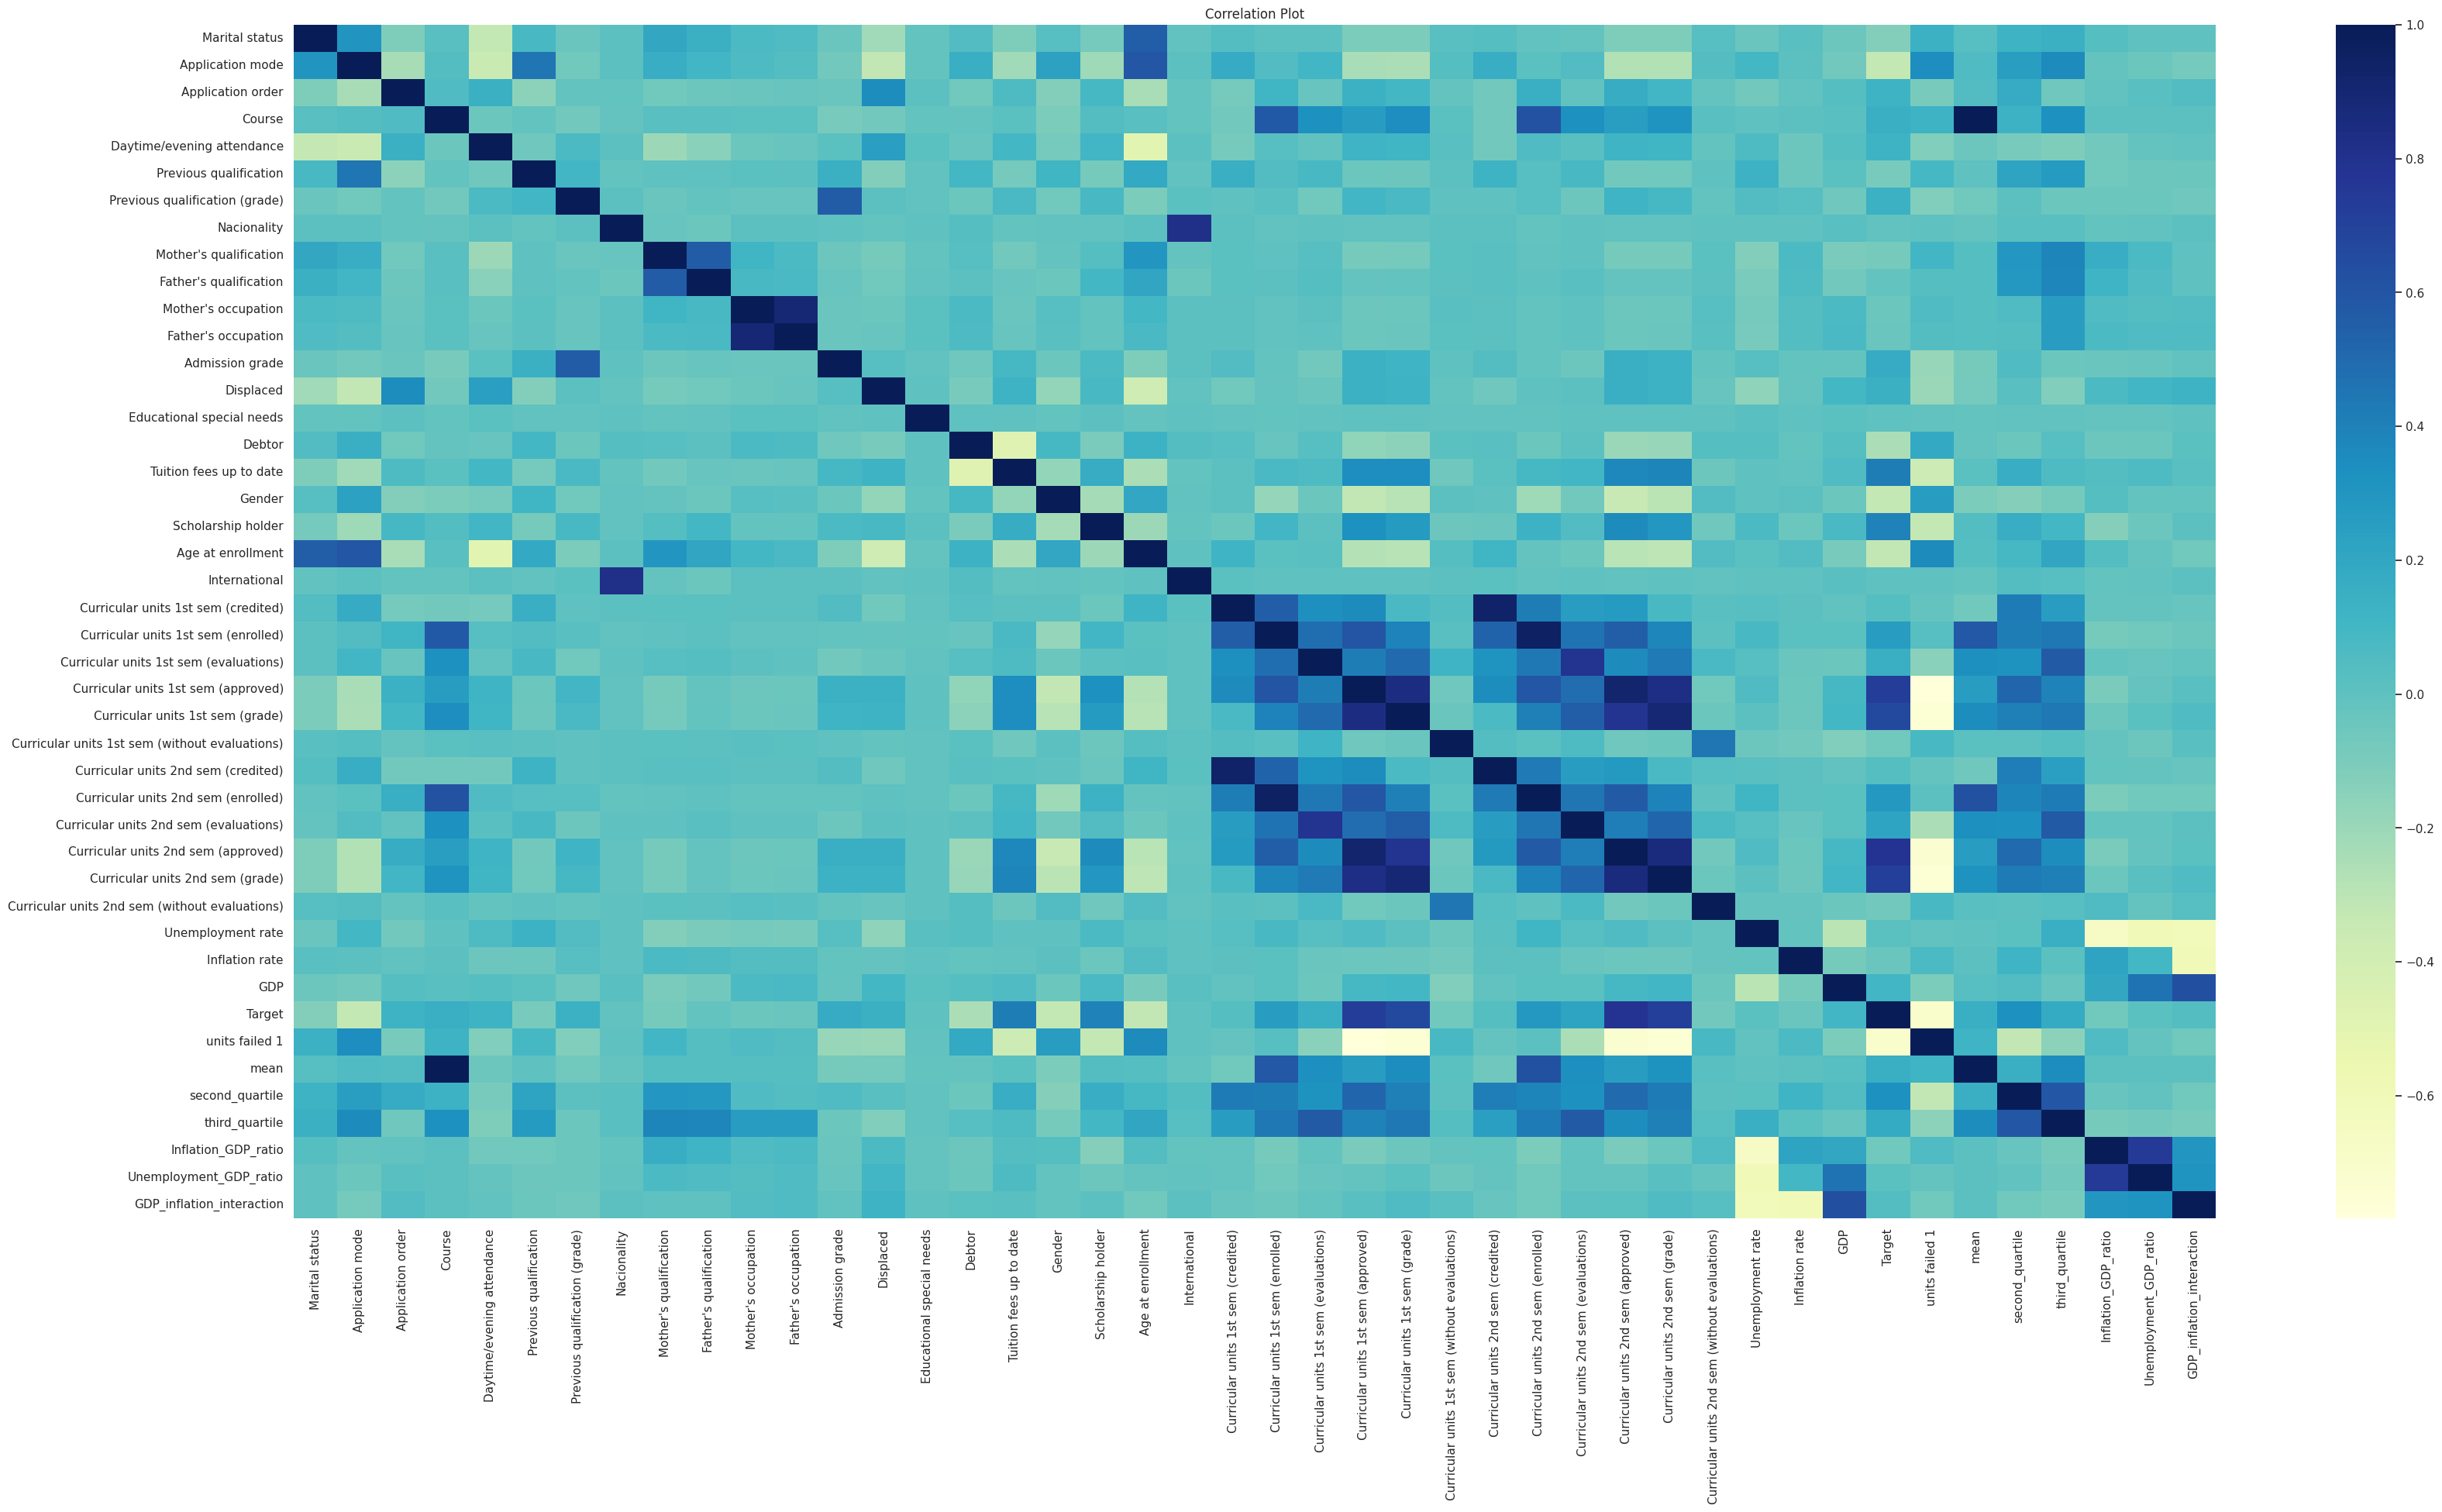

In [37]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [38]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
Course and mean
Nacionality and International
Mother's occupation and Father's occupation
Curricular units 1st sem (credited) and Curricular units 2nd sem (credited)
Curricular units 1st sem (enrolled) and Curricular units 2nd sem (enrolled)
Curricular units 1st sem (evaluations) and Curricular units 2nd sem (evaluations)
Curricular units 1st sem (approved) and Curricular units 1st sem (grade)
Curricular units 1st sem (approved) and Curricular units 2nd sem (approved)
Curricular units 1st sem (approved) and Curricular units 2nd sem (grade)
Curricular units 1st sem (grade) and Curricular units 2nd sem (approved)
Curricular units 1st sem (grade) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Target


In [39]:
# droping columns which are highly correlated
cols = ['Nacionality']
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

<a id='4.4'></a>
## **4. Splitting the features in dependent and independent features**


In [40]:
x = train_df.drop(['Target'], axis=1)
y = train_df['Target']

In [41]:
from sklearn.utils.class_weight import compute_class_weight
# Convert y to a NumPy array if it's not already one
arr = np.array(y)

# Calculate unique classes in y
unique_classes = np.unique(arr)

# Convert unique_classes to a list to ensure hashability
unique_classes_list = list(unique_classes)

# Calculate class weights based on the training data
class_weights = compute_class_weight('balanced',
                                     classes=unique_classes,
                                     y=y)

# Create a dictionary of class weights
class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)

{0: 1.0083017077798861, 1: 1.7072289156626506, 2: 0.7029932197784026}


In [42]:
class_weights_dict = {0: 1.0083017077798861, 1: 1.7072289156626506, 2: 0.7029932197784026}

<a id='4.5'></a>
## **5. Checking Feature Importance**


In [43]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [44]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

Features    Scores
0              Curricular units 2nd sem (approved)  0.480399
1                 Curricular units 2nd sem (grade)  0.412157
2              Curricular units 1st sem (approved)  0.407722
3                 Curricular units 1st sem (grade)  0.359493
4                                   units failed 1  0.344892
5           Curricular units 2nd sem (evaluations)  0.200628
6           Curricular units 1st sem (evaluations)  0.186533
7                                   third_quartile  0.154280
8                                  second_quartile  0.130701
9                                           Course  0.115658
10                         Tuition fees up to date  0.112959
11                                 Admission grade  0.107018
12                               Age at enrollment  0.099932
13                                            mean  0.094697
14                              Scholarship holder  0.093864
15                                Application mode  0.089081
16                  Previous qualification (grade)  0.087725
17             Curricular units 2nd sem (enrolled)  0.083852
18             Curricular units 1st sem (enrolled)  0.082177
19                                          Gender  0.064867
20                                          Debtor  0.041534
21                          Previous qualification  0.040788
22                             Mother's occupation  0.031382
23                          Mother's qualification  0.031321
24                          Father's qualification  0.031115
25                             Father's occupation  0.028251
26                                  Marital status  0.019823
27                               Application order  0.017966
28                      Daytime/evening attendance  0.016995
29                                  Inflation rate  0.016896
30                                       Displaced  0.014980
31  Curricular units 2nd sem (without evaluations)  0.014646
32                             Inflation_GDP_ratio  0.013565
33  Curricular units 1st sem (without evaluations)  0.012324
34                               Unemployment rate  0.012306
35                          Unemployment_GDP_ratio  0.011065
36                                             GDP  0.010910
37             Curricular units 1st sem (credited)  0.010565
38             Curricular units 2nd sem (credited)  0.010449
39                       Educational special needs  0.009551
40                                   International  0.009286
41                       GDP_inflation_interaction  0.007584

In [45]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['Educational special needs', 'International', 'GDP_inflation_interaction']

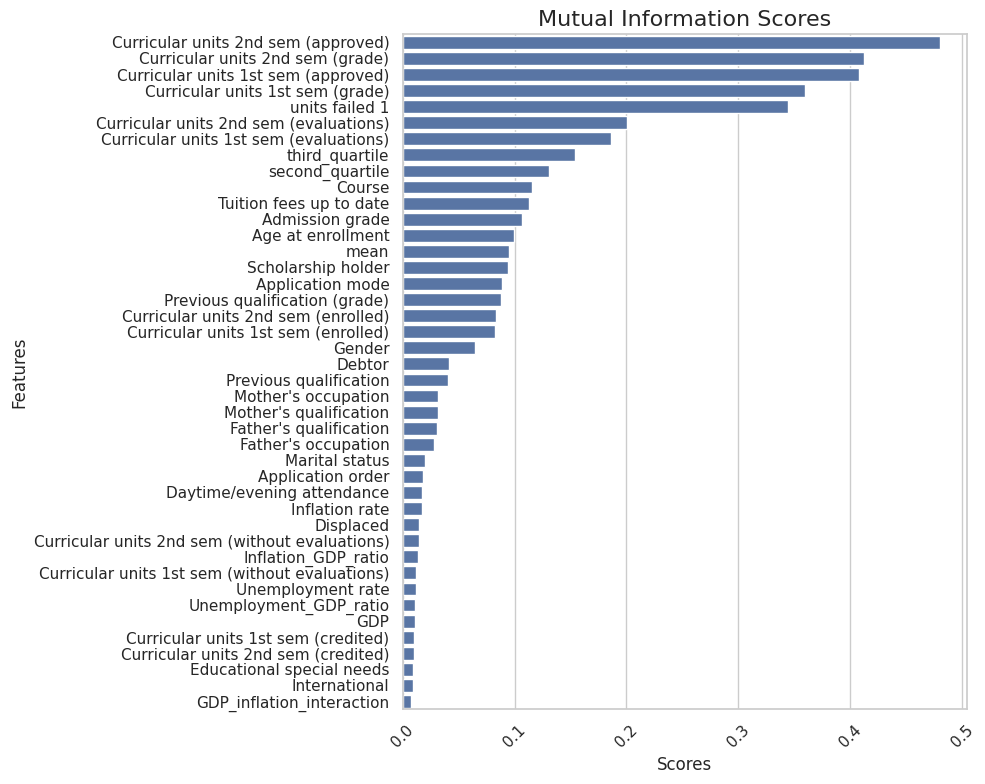

In [46]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [47]:
x.drop(low_score_feature_names,axis = 1,inplace = True)
test_df.drop(low_score_feature_names,axis = 1,inplace = True)


## **6.Feature Scaling**


In [48]:
scaler = StandardScaler()

In [49]:
x_scaled = scaler.fit_transform(x)

In [50]:
test_df_scaled = scaler.transform(test_df)

<a id='4.7'></a>
## **7.Implementing PCA**

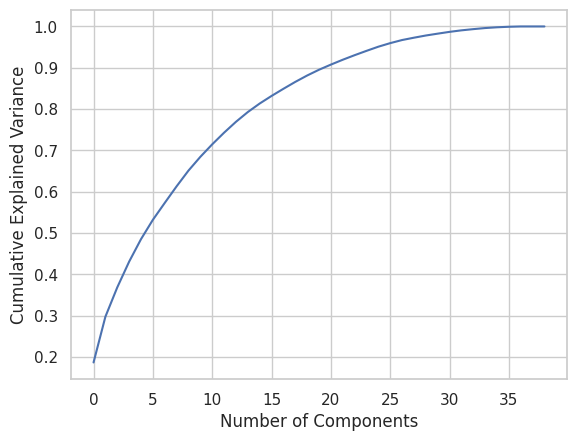

In [51]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [52]:
## PCA- Transformation
pca=PCA(n_components=35)
pca

PCA(n_components=35)

In [53]:
#Scaled Data
x_scaled=pca.fit_transform(x_scaled)

In [54]:
test_df_scaled = pca.transform(test_df_scaled)


## **8 .Dividing in train-test-split**


#### **Split the Data into training and testing for unscaled**

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Split the Data into training and testing for scaled**

In [56]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)



# 5 | Baseline Model Building




In [57]:
Training_Accuracy = []
Testing_Accuracy = []

#For scaled data
def model_prediction(model, x, y, n_splits, random_state):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    training_score = []
    testing_score = []
    precission = []
    recall = []
    f1_score_ = []


    x = pd.DataFrame(x)  # Convert x to DataFrame

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred, average='weighted')
        d = recall_score(y_test, x_test_pred, average='weighted')
        e = f1_score(y_test, x_test_pred, average='weighted')

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        f1_score_.append(e)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    # Classification report and confusion matrix
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, x_test_pred))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

    Training_Accuracy.append(np.mean(training_score))
    Testing_Accuracy.append(np.mean(testing_score))

#### **models trained on scaled data**



## **1. SGD Classifier**

In [58]:
sgd_model = SGDClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of SGDClassifier() model on Training Data is: 80.33632787994196
Mean Accuracy_Score of SGDClassifier() model on Testing Data is: 80.25431065093576
Mean Precision Score of SGDClassifier() model is: 0.7951923946262316
Mean Recall Score of SGDClassifier() model is: 0.8025431065093578
Mean f1 Score of SGDClassifier() model is: 0.793425195368715

------------------------------------------------------------------------
Classification Report of SGDClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      5059
           1       0.63      0.42      0.50      2988
           2       0.79      0.95      0.87      7256

    accuracy                           0.80     15303
   macro avg       0.77      0.73      0.74     15303
weighted avg       0.79      0.80      0.79     15303


--------------------------------------------------------

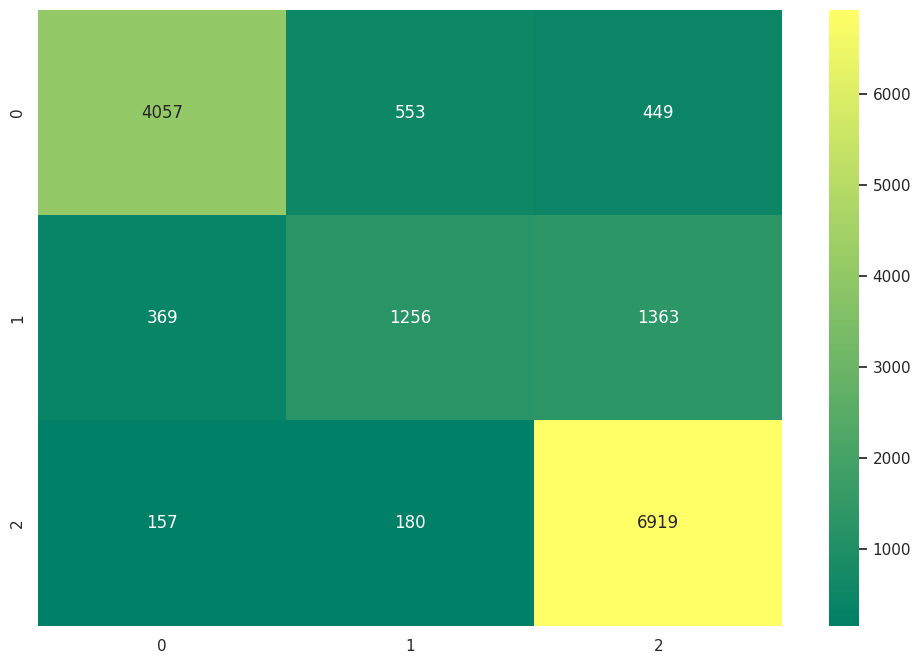

In [59]:
model_prediction(sgd_model, x_scaled, y, n_splits=5, random_state=42)


## **2. Logisitc Regression**

In [60]:
LogisticRegression_model = LogisticRegression()


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 81.59844744537357
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 81.54421238123552
Mean Precision Score of LogisticRegression() model is: 0.8129693221934591
Mean Recall Score of LogisticRegression() model is: 0.815442123812355
Mean f1 Score of LogisticRegression() model is: 0.8122560275707311

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5059
           1       0.62      0.57      0.59      2988
           2       0.84      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.78      0.77      0.77     15303
weighted avg       0.81      0.82      0.81     15303


--------------------------

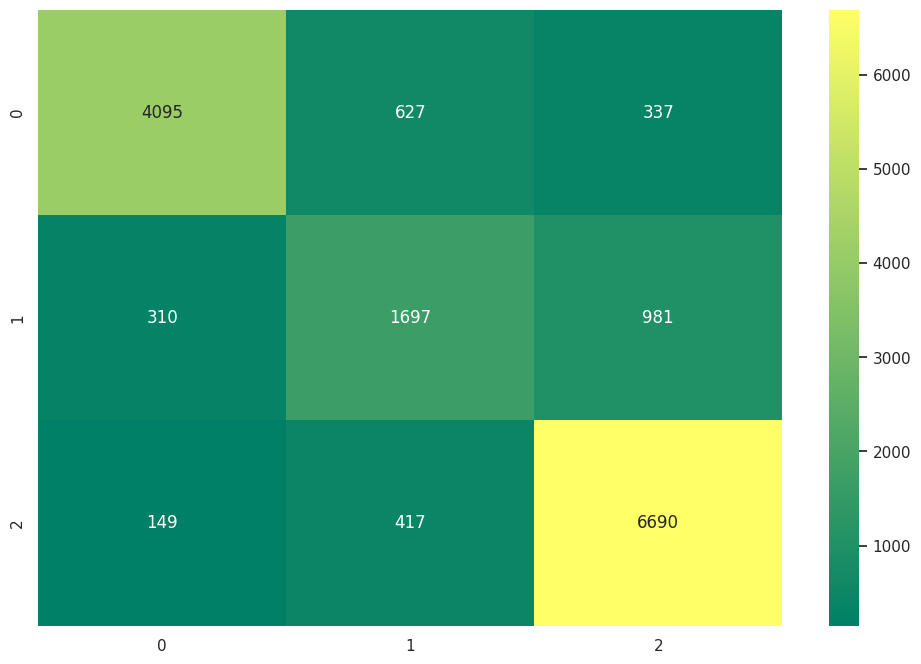

In [61]:
model_prediction(LogisticRegression_model, x_scaled, y, n_splits=5, random_state=42)


## **3. K Nearest Neighbor**

In [62]:
KNN_Model = KNeighborsClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.97631920779482
Mean Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 77.85619149735716
Mean Precision Score of KNeighborsClassifier() model is: 0.7730747981999024
Mean Recall Score of KNeighborsClassifier() model is: 0.7785619149735714
Mean f1 Score of KNeighborsClassifier() model is: 0.7748730476815859

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5059
           1       0.55      0.49      0.52      2988
           2       0.82      0.88      0.85      7256

    accuracy                           0.78     15303
   macro avg       0.73      0.72      0.73     15303
weighted avg       0.77      0.78      0.77     15303


-------------

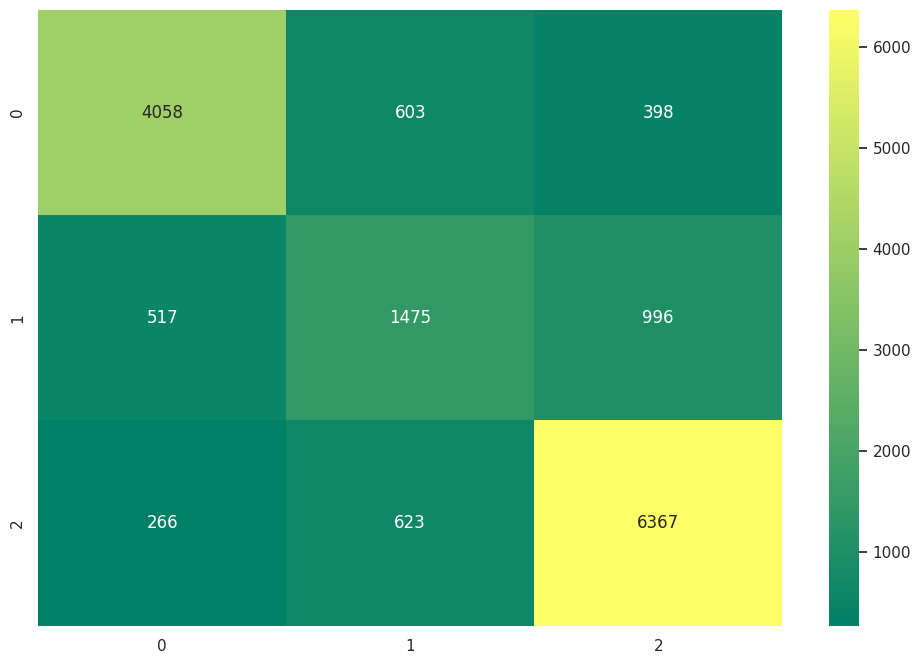

In [63]:
model_prediction(KNN_Model, x_scaled, y, n_splits=5, random_state=42)


## **4. Naive Bayes**

In [64]:
NB_model = GaussianNB()


------------------------------------------------------------------------
Mean Accuracy_Score of GaussianNB() model on Training Data is: 73.69769139561598
Mean Accuracy_Score of GaussianNB() model on Testing Data is: 73.66111073137401
Mean Precision Score of GaussianNB() model is: 0.7244984616804535
Mean Recall Score of GaussianNB() model is: 0.73661110731374
Mean f1 Score of GaussianNB() model is: 0.7271262070604291

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5059
           1       0.54      0.41      0.47      2988
           2       0.77      0.86      0.81      7256

    accuracy                           0.74     15303
   macro avg       0.70      0.68      0.68     15303
weighted avg       0.73      0.74      0.73     15303


------------------------------------------------------------------------
Co

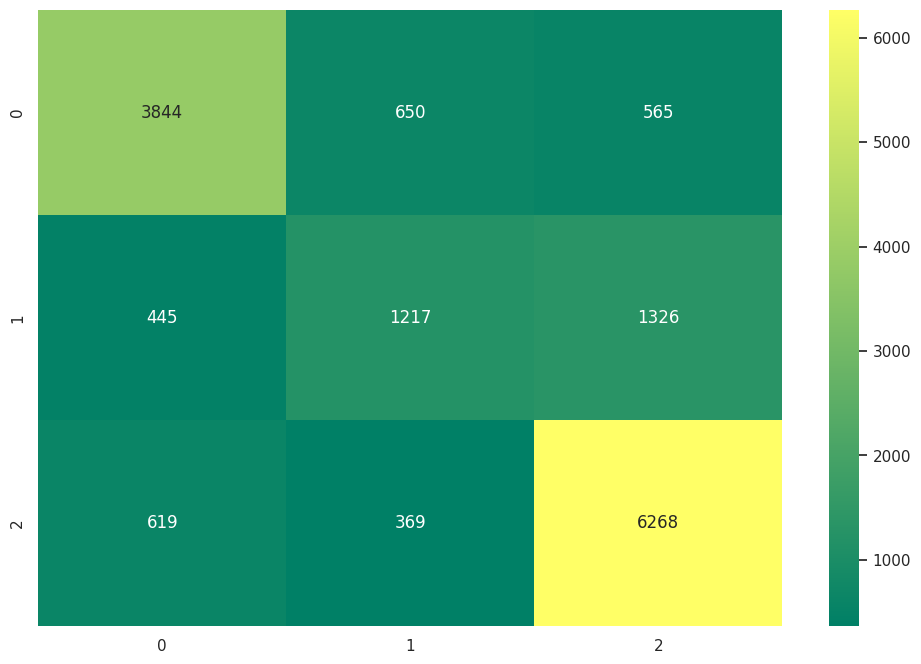

In [65]:
model_prediction(NB_model, x_scaled, y, n_splits=5, random_state=42)

#### **Model trained on unscaled data**



## **5. Decision Tree**

In [66]:
DecisionTreeClassifier_model = DecisionTreeClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Mean Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.20215036639735
Mean Precision Score of DecisionTreeClassifier() model is: 0.744328548244743
Mean Recall Score of DecisionTreeClassifier() model is: 0.7420215036639735
Mean f1 Score of DecisionTreeClassifier() model is: 0.7431188283553111

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      5059
           1       0.47      0.49      0.48      2988
           2       0.83      0.81      0.82      7256

    accuracy                           0.74     15303
   macro avg       0.69      0.70      0.70     15303
weighted avg       0.74      0.74      0.74     15303


--------------

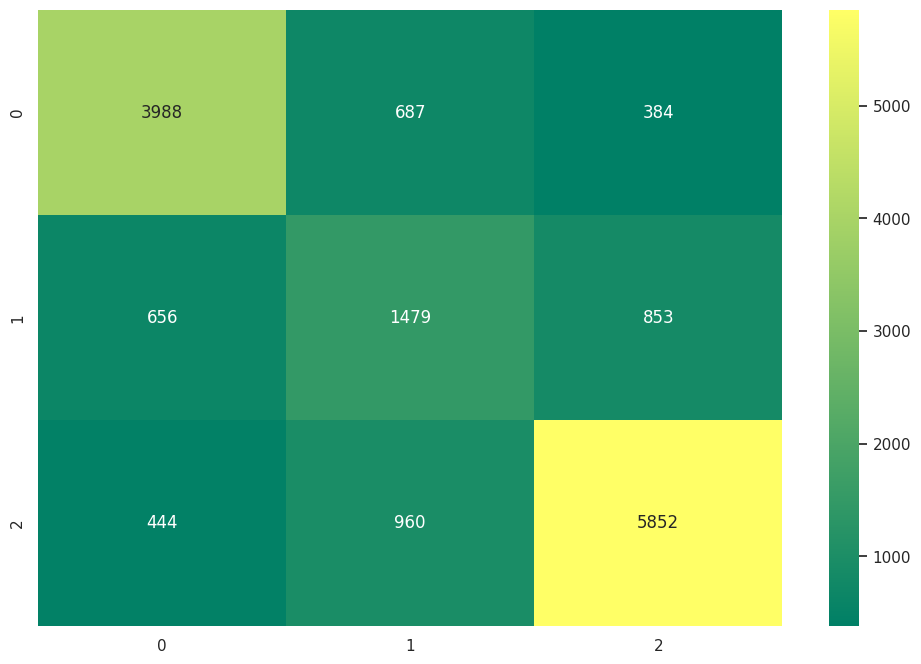

In [67]:
model_prediction(DecisionTreeClassifier_model, x, y, n_splits=5, random_state=42)

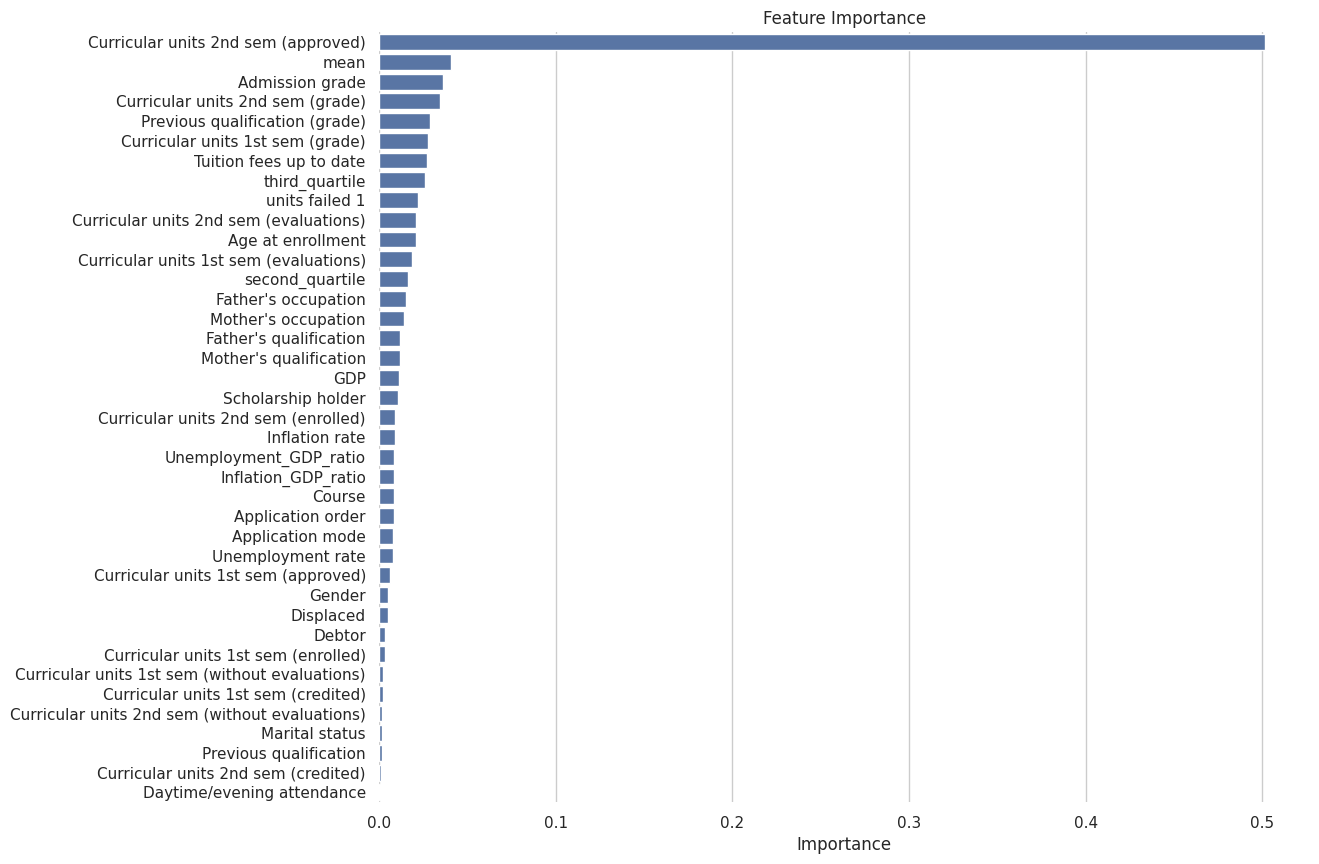

In [68]:
# feature importances
feature_importance = DecisionTreeClassifier_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **6. Extra Tree Classifier**

In [69]:
ETCLF_model = ExtraTreesClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Mean Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 82.17935385983752
Mean Precision Score of ExtraTreesClassifier() model is: 0.8203719193429986
Mean Recall Score of ExtraTreesClassifier() model is: 0.8217935385983752
Mean f1 Score of ExtraTreesClassifier() model is: 0.8193744360096176

------------------------------------------------------------------------
Classification Report of ExtraTreesClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      5059
           1       0.63      0.59      0.61      2988
           2       0.84      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.78      0.78     15303
weighted avg       0.82      0.82      0.82     15303


-------------------------

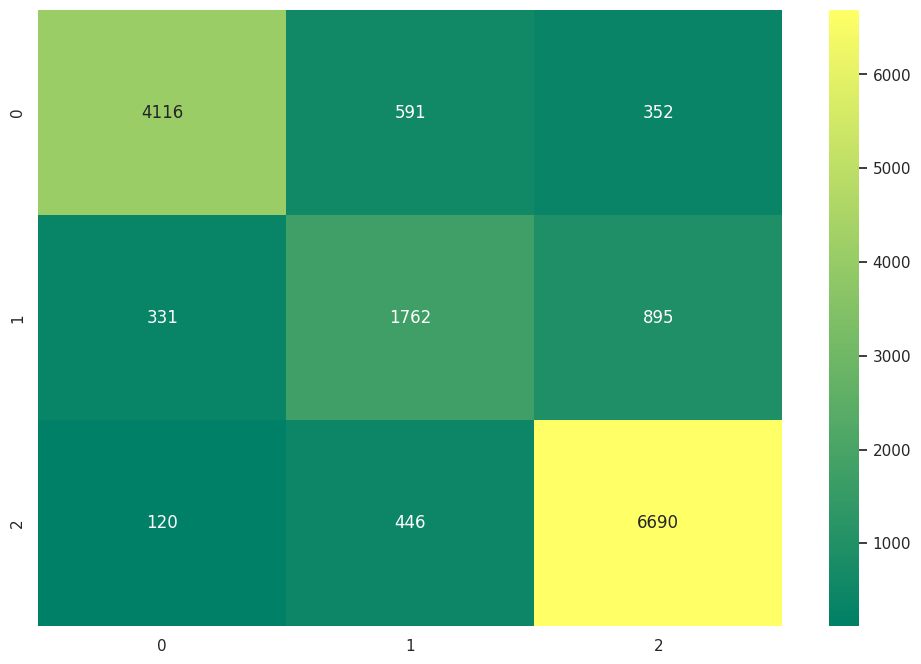

In [70]:
model_prediction(ETCLF_model, x, y, n_splits=5, random_state=42)

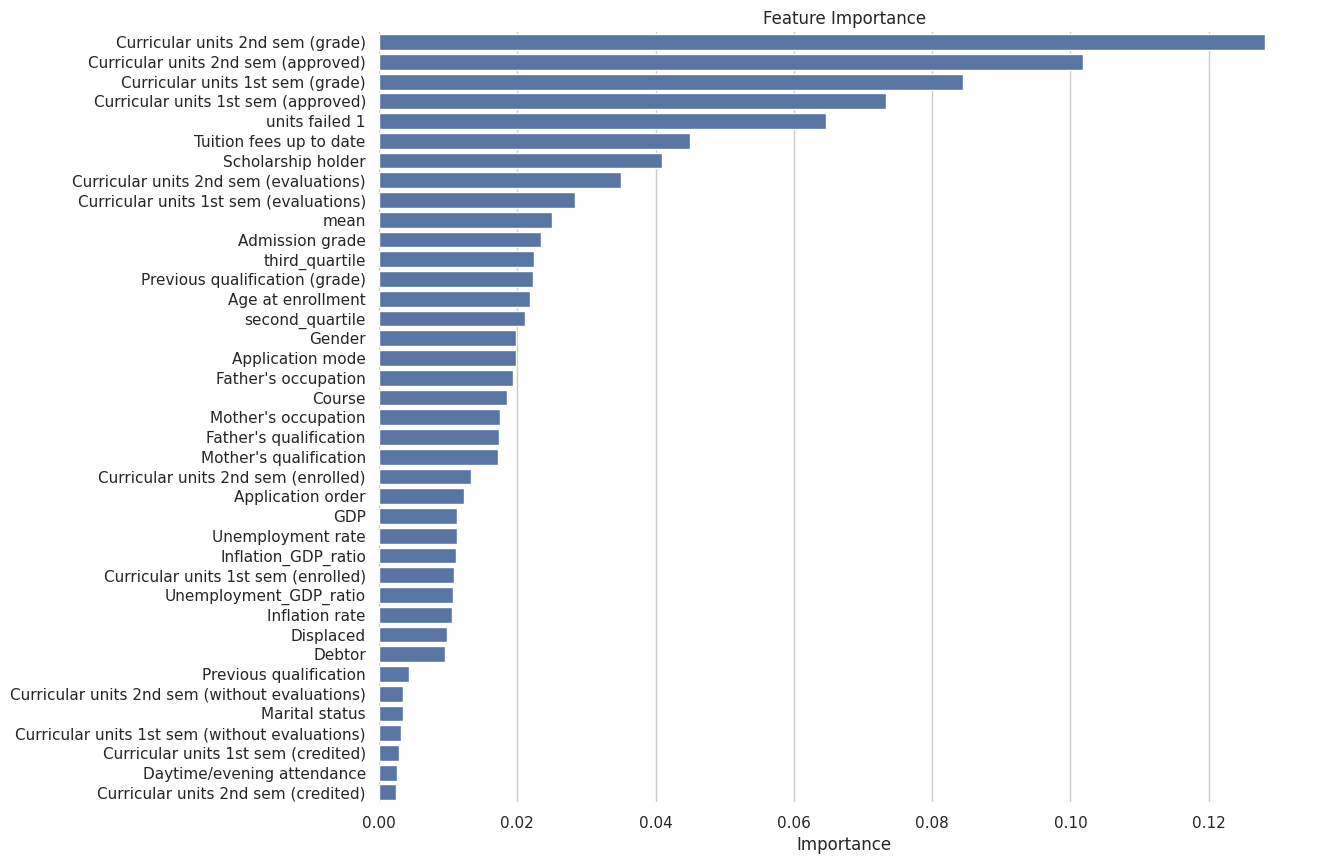

In [71]:
# feature importances
feature_importance = ETCLF_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **7. Random Forest**

In [72]:
RF_model = RandomForestClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 99.99901984273916
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 82.35447233012847
Mean Precision Score of RandomForestClassifier() model is: 0.821866079646125
Mean Recall Score of RandomForestClassifier() model is: 0.8235447233012849
Mean f1 Score of RandomForestClassifier() model is: 0.821253379404783

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5059
           1       0.63      0.59      0.61      2988
           2       0.84      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.78      0.78     15303
weighted avg       0.82      0.82      0.82     15303


---

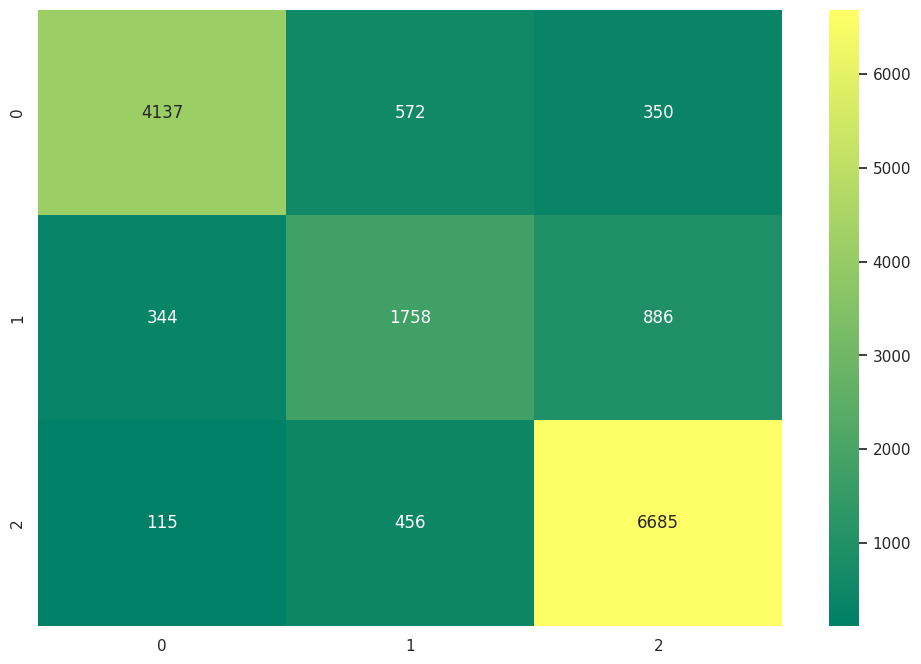

In [73]:
model_prediction(RF_model, x, y, n_splits=5, random_state=42)

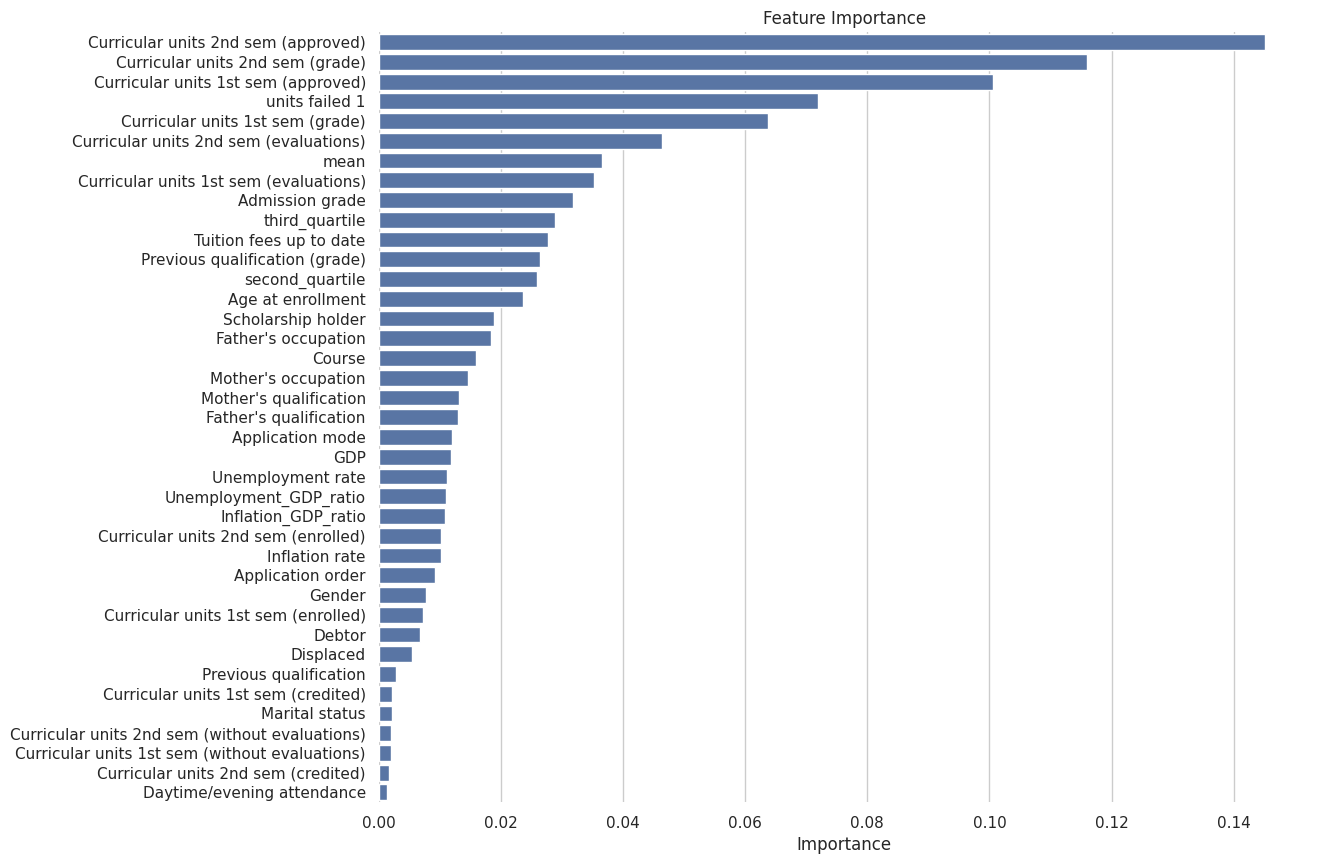

In [74]:
# feature importances
feature_importance = RF_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **8. Ada Boost**

In [75]:
AdaBoostClassifier_model = AdaBoostClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of AdaBoostClassifier() model on Training Data is: 82.08885431423376
Mean Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 81.98463045095107
Mean Precision Score of AdaBoostClassifier() model is: 0.8183184459965952
Mean Recall Score of AdaBoostClassifier() model is: 0.8198463045095107
Mean f1 Score of AdaBoostClassifier() model is: 0.8177235486286472

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5059
           1       0.63      0.59      0.61      2988
           2       0.85      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.78      0.78     15303
weighted avg       0.82      0.82      0.82     15303


-------------------------

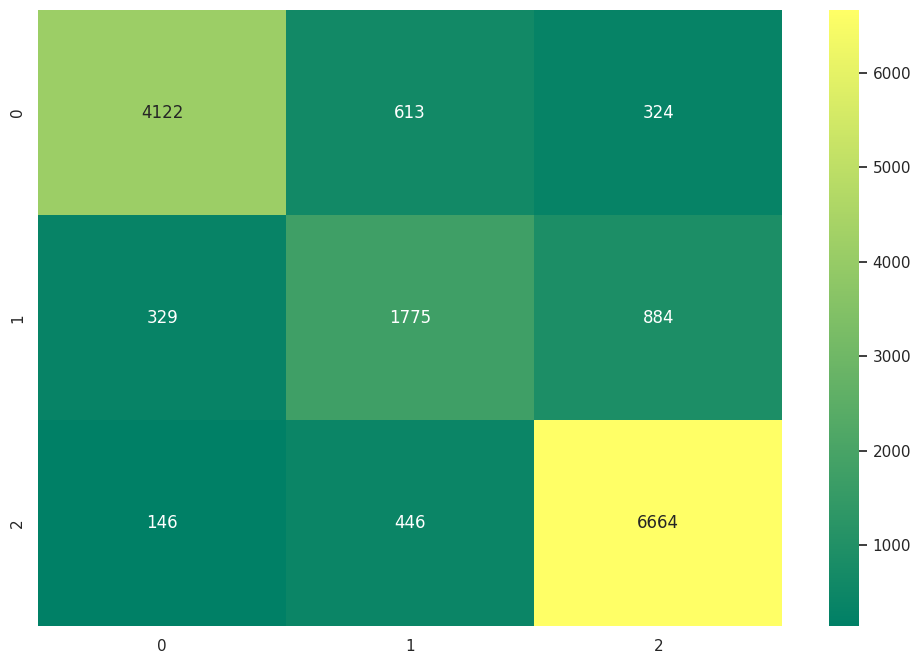

In [76]:
model_prediction(AdaBoostClassifier_model, x, y, n_splits=5, random_state=42)

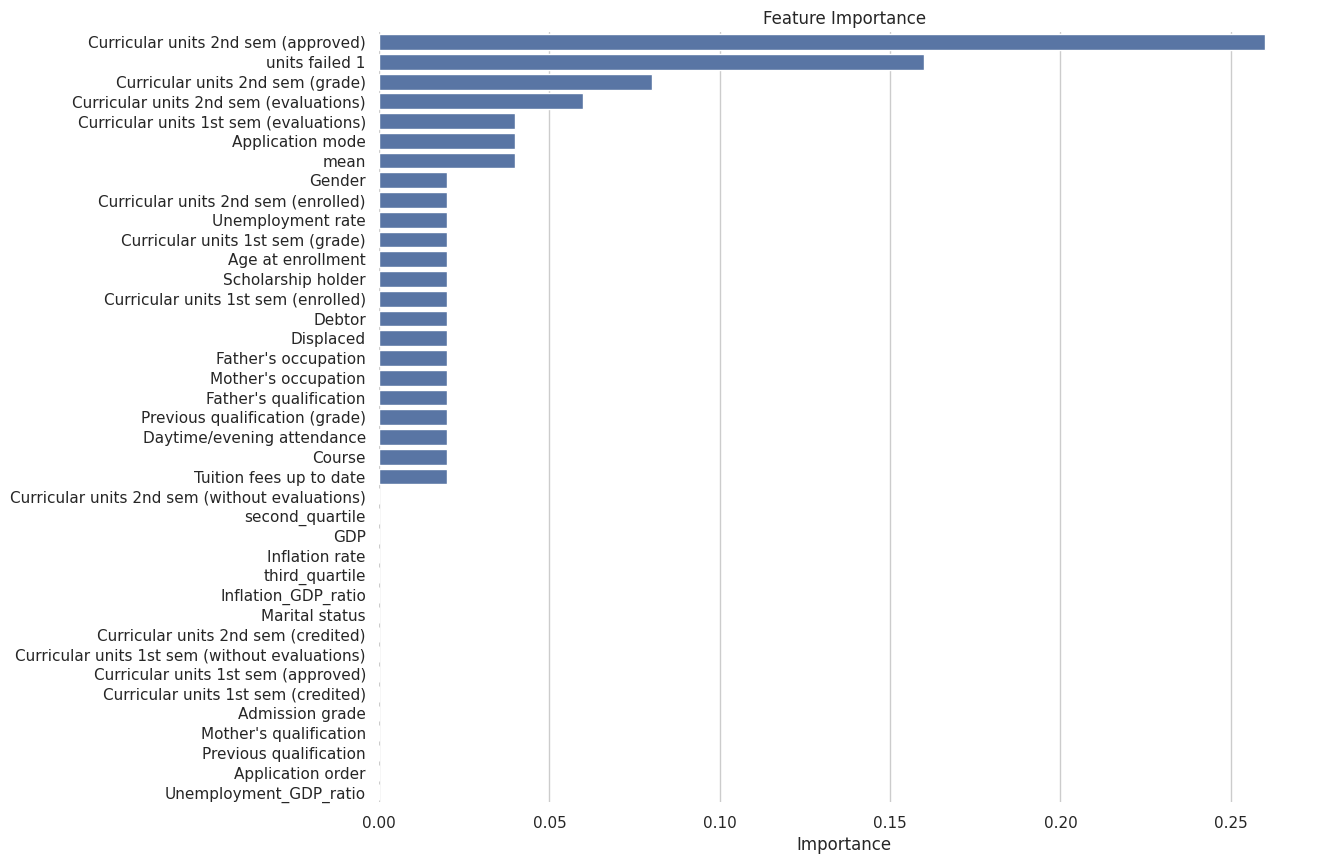

In [77]:
# feature importances
feature_importance = AdaBoostClassifier_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **9. GradientBoost**

In [78]:
GB_model = GradientBoostingClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 83.11606420470653
Mean Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 82.74523624356222
Mean Precision Score of GradientBoostingClassifier() model is: 0.8261844395115248
Mean Recall Score of GradientBoostingClassifier() model is: 0.8274523624356223
Mean f1 Score of GradientBoostingClassifier() model is: 0.8255036840088421

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5059
           1       0.64      0.61      0.63      2988
           2       0.85      0.92      0.88      7256

    accuracy                           0.83     15303
   macro avg       0.80      0.79      0.79     15303
weighted avg       0.83      0.83

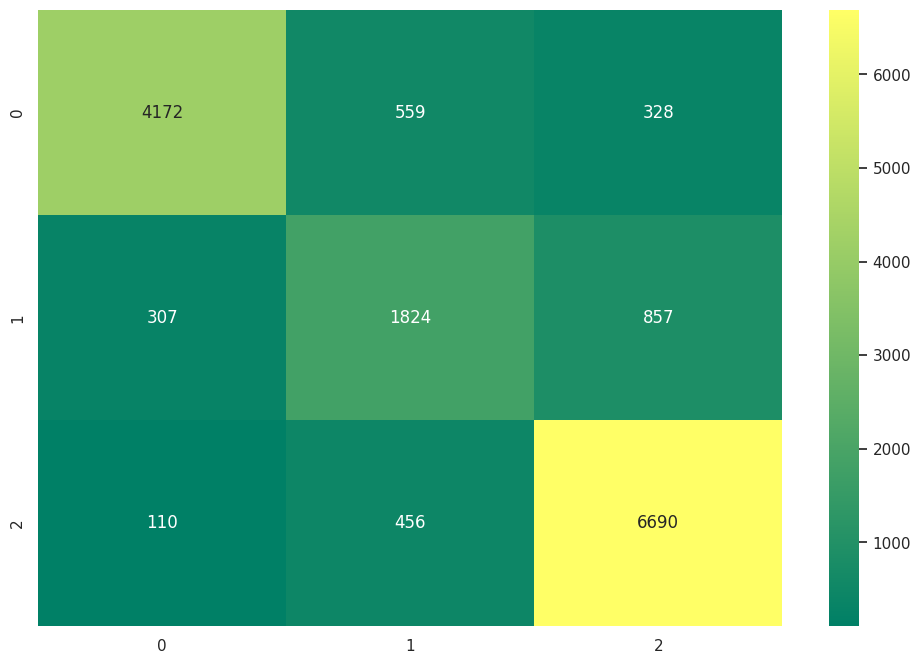

In [79]:
model_prediction(GB_model, x, y, n_splits=5, random_state=42)

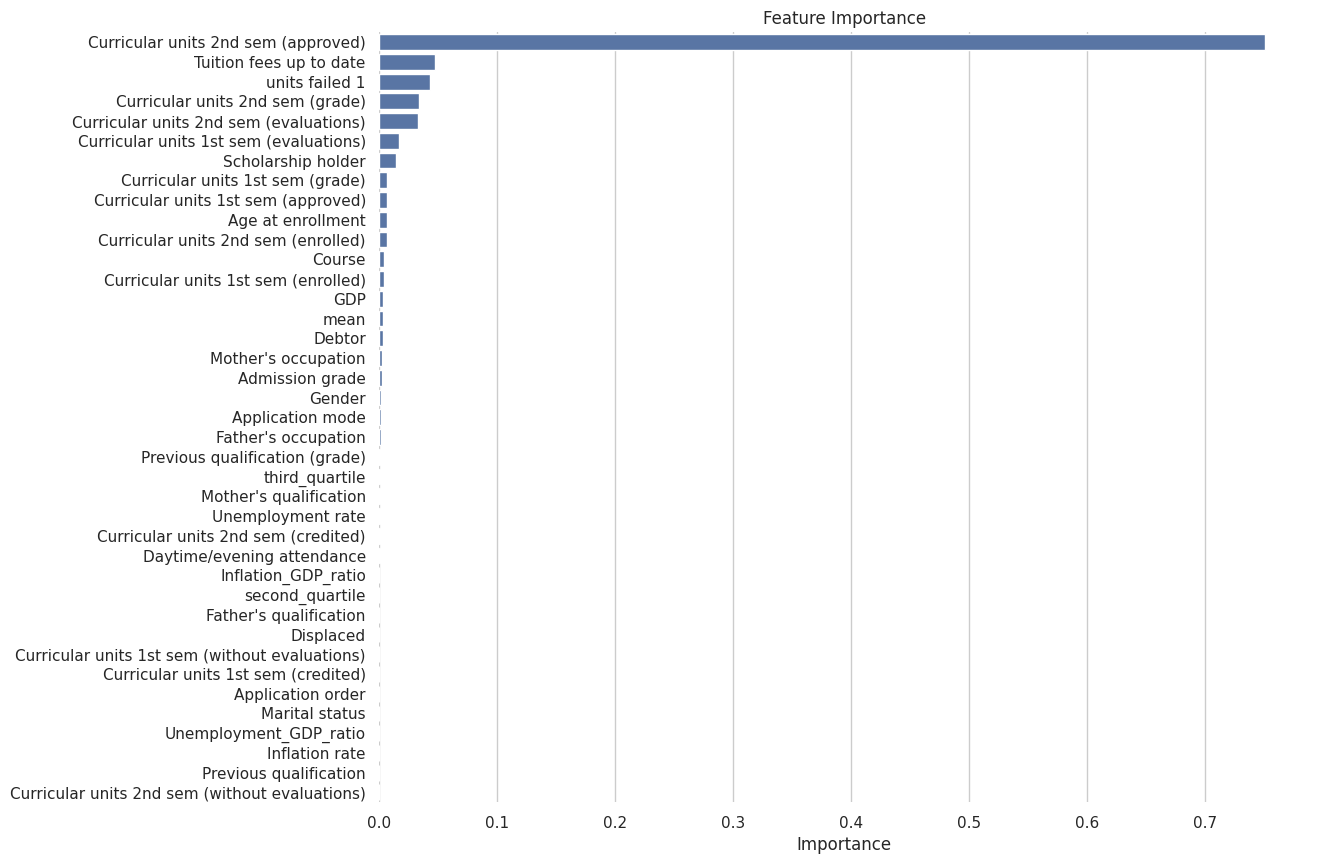

In [80]:
# feature importances
feature_importance = GB_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **10. XG Boost**

In [81]:
XGBClassifier_model = XGBClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) model on Training Data is: 88.61967087391658
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
       

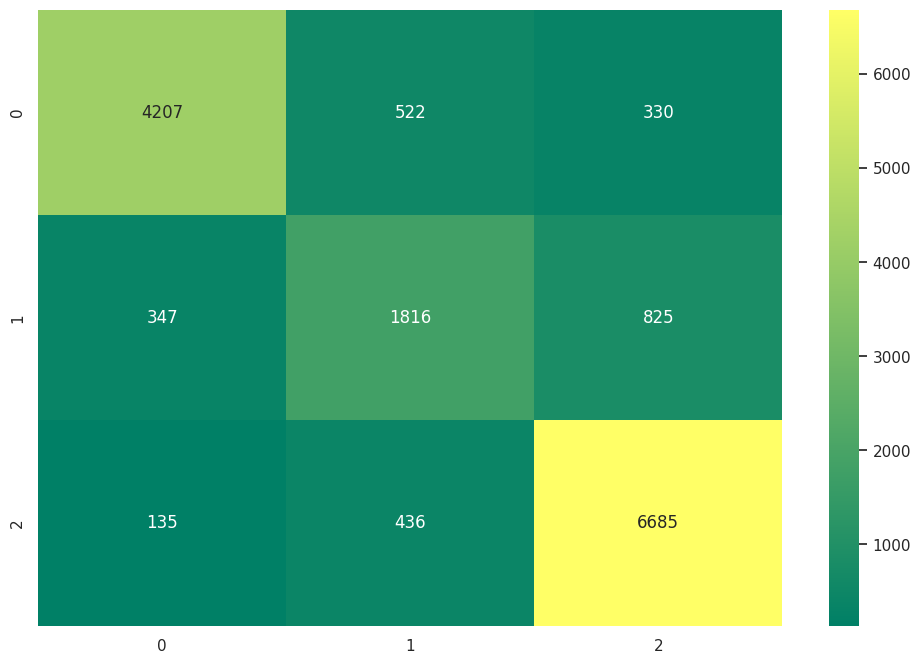

In [82]:
model_prediction(XGBClassifier_model, x, y, n_splits=5, random_state=42)

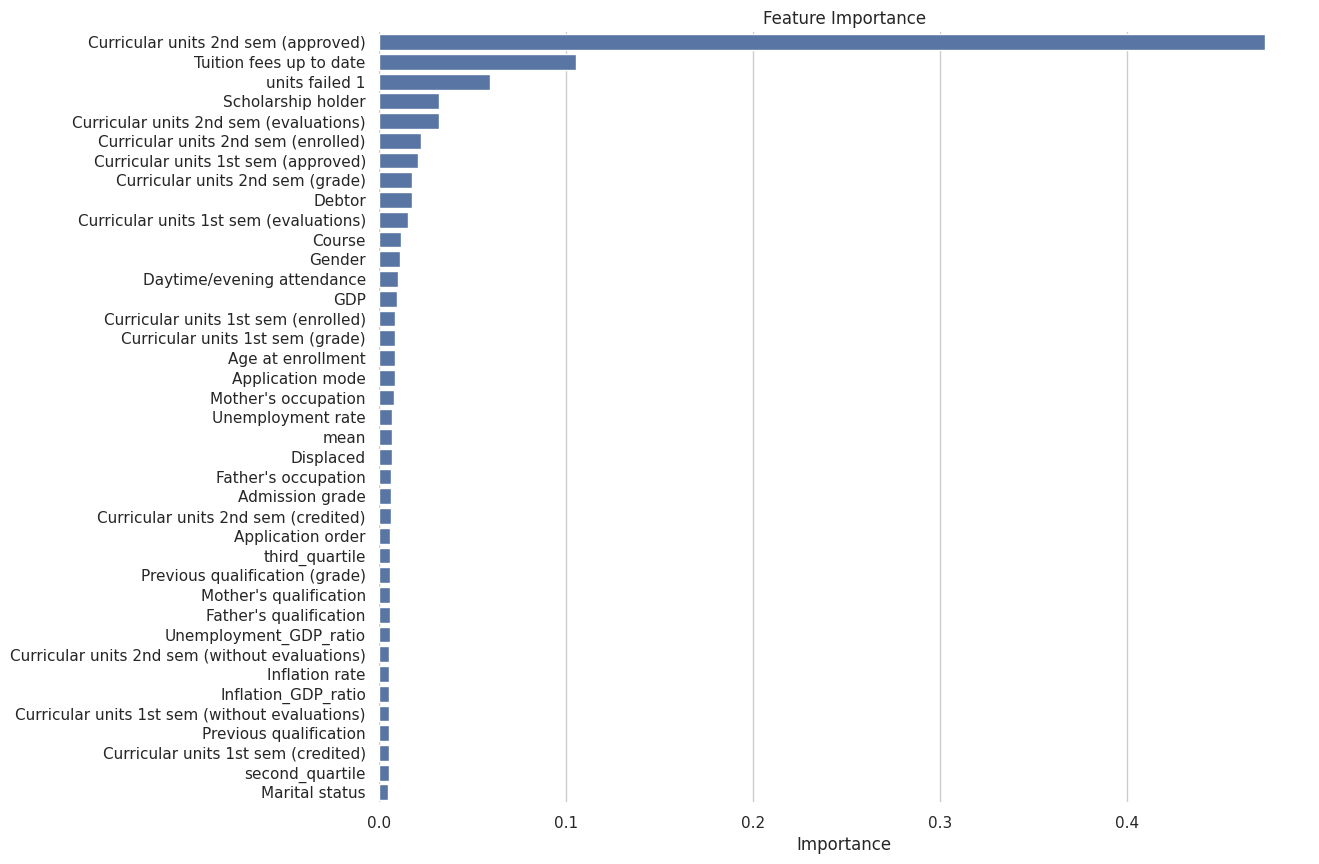

In [83]:
# feature importances
feature_importance = XGBClassifier_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **11. CatBoost**

In [84]:
CatBoost_model = CatBoostClassifier()

Выходные данные были обрезаны до нескольких последних строк (5000).
27:	learn: 0.4837850	total: 1.53s	remaining: 53.1s
28:	learn: 0.4813749	total: 1.6s	remaining: 53.5s
29:	learn: 0.4792529	total: 1.64s	remaining: 53.1s
30:	learn: 0.4773399	total: 1.69s	remaining: 52.8s
31:	learn: 0.4756437	total: 1.74s	remaining: 52.6s
32:	learn: 0.4741519	total: 1.79s	remaining: 52.4s
33:	learn: 0.4728590	total: 1.84s	remaining: 52.4s
34:	learn: 0.4715047	total: 1.89s	remaining: 52.2s
35:	learn: 0.4702223	total: 1.95s	remaining: 52.1s
36:	learn: 0.4690125	total: 2s	remaining: 52.2s
37:	learn: 0.4680087	total: 2.05s	remaining: 51.9s
38:	learn: 0.4667483	total: 2.1s	remaining: 51.7s
39:	learn: 0.4658121	total: 2.18s	remaining: 52.3s
40:	learn: 0.4646763	total: 2.23s	remaining: 52.2s
41:	learn: 0.4635976	total: 2.27s	remaining: 51.9s
42:	learn: 0.4628151	total: 2.33s	remaining: 51.8s
43:	learn: 0.4622724	total: 2.37s	remaining: 51.5s
44:	learn: 0.4614214	total: 2.42s	remaining: 51.3s
45:	learn: 0.460612

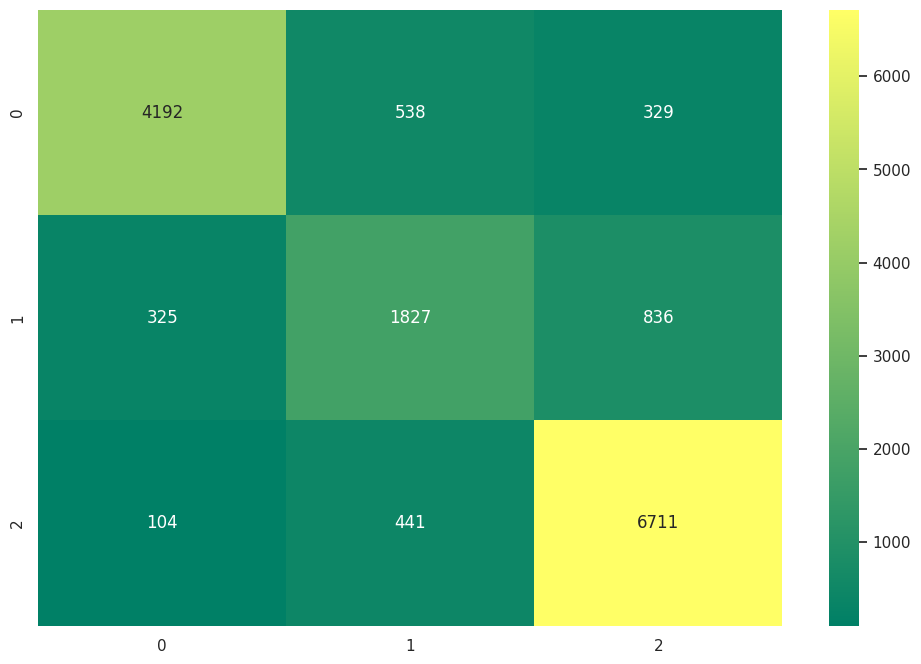

In [85]:
model_prediction(CatBoost_model, x, y, n_splits=5, random_state=42)

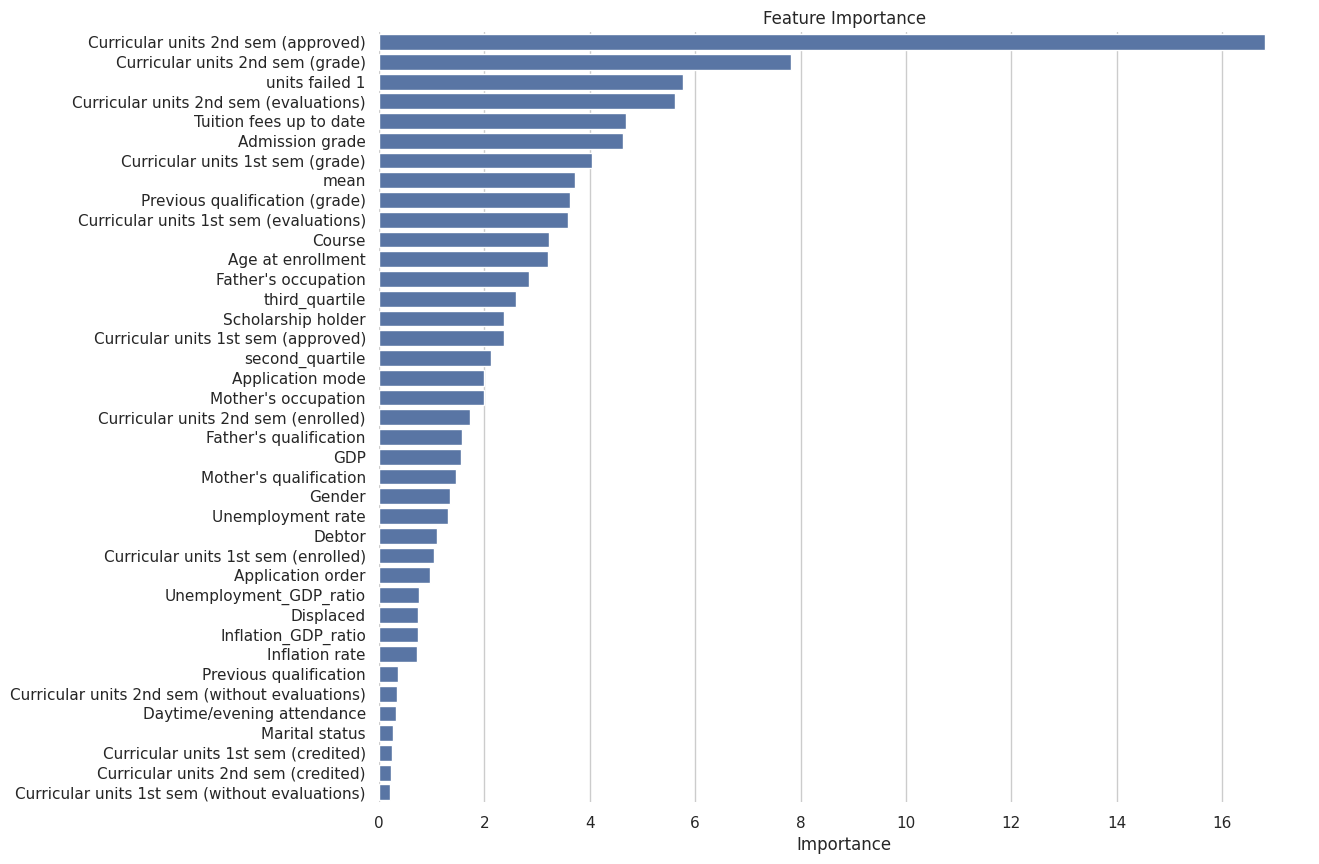

In [86]:
# feature importances
feature_importance = CatBoost_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **12. LGBM**

In [87]:
LGBM_model =  LGBMClassifier()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 39
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2008
[LightGBM] [Info] Number of data points in the train set: 61214, 

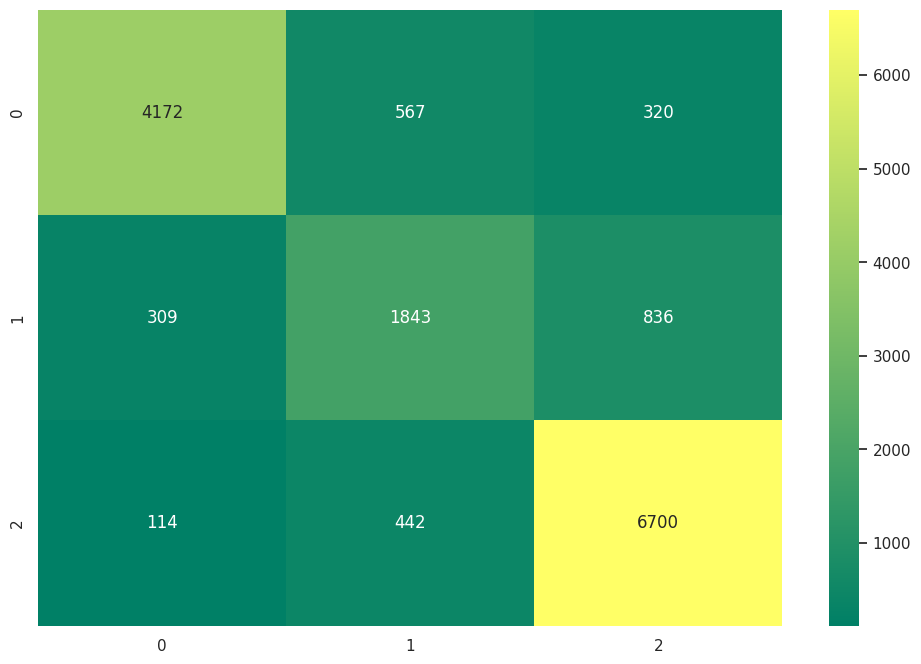

In [88]:
model_prediction(LGBM_model, x, y, n_splits=5, random_state=42)

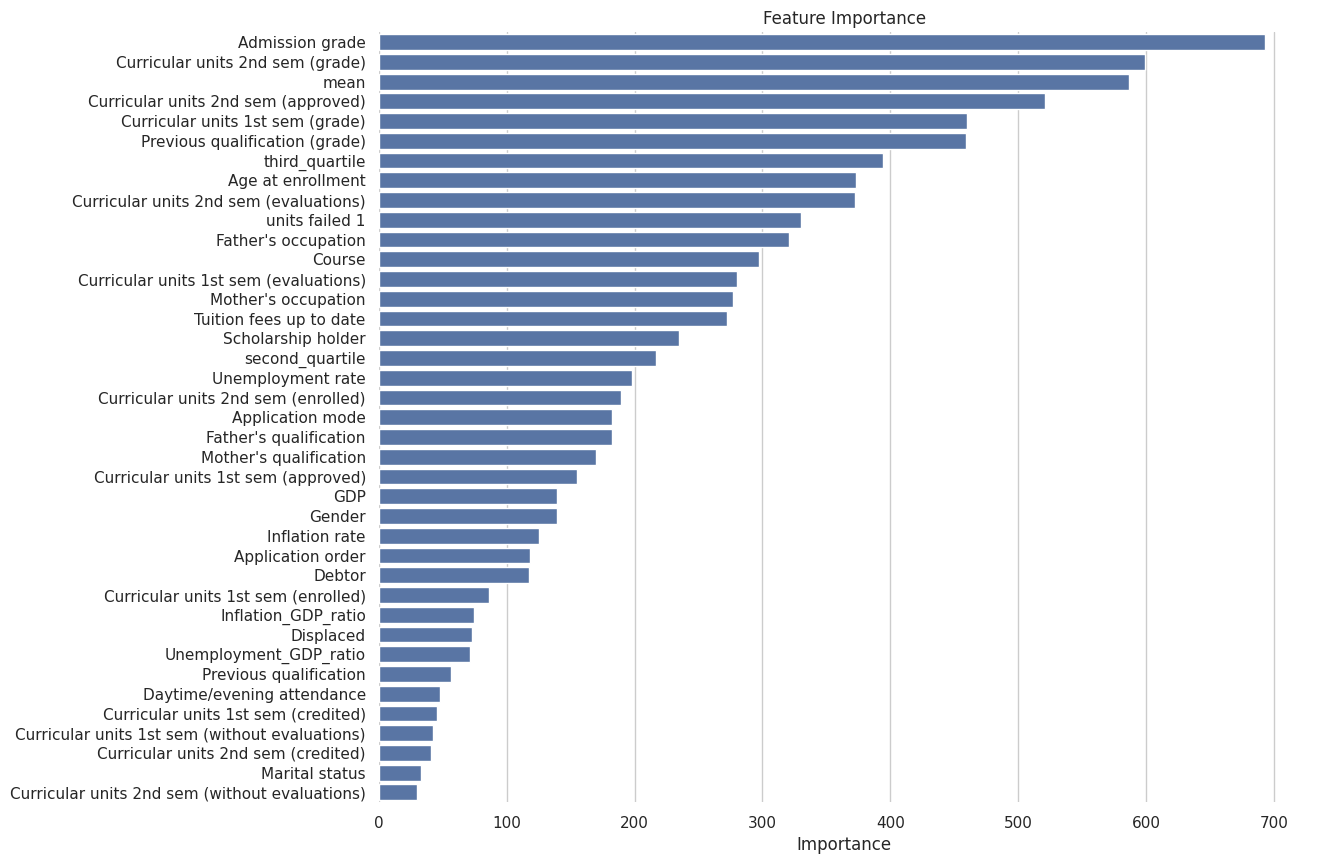

In [89]:
# feature importances
feature_importance = LGBM_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

The performance of machine learning models can be influenced by whether the input features are scaled or not. Here’s a breakdown of the listed models and how they typically respond to scaling:

### Models that Perform Better with Scaling:

1. **SGDClassifier**: Stochastic Gradient Descent is highly sensitive to feature scaling. Scaling the features can significantly improve performance and convergence speed.
   
2. **Logistic Regression**: This model also benefits from feature scaling, especially when using gradient-based solvers. It ensures that the coefficients are updated uniformly.

3. **K-Nearest Neighbors (KNN)**: KNN calculates distances between data points. Without scaling, features with larger ranges can dominate the distance calculation, so scaling is crucial.

4. **Naive Bayes**: Although not always necessary, scaling can sometimes improve performance, especially with Gaussian Naive Bayes where the assumption is that data follows a Gaussian distribution.

5. **Support Vector Machines (SVMs)**: Though not listed, it's worth mentioning that SVMs also benefit significantly from scaling due to the way they compute margins.

### Models that are Less Sensitive to Scaling:

6. **Decision Tree**: Trees split data based on feature values, so scaling does not affect their performance. However, if used in conjunction with methods that do benefit from scaling (e.g., Gradient Boosting), scaling might help.

7. **Random Forest**: Similar to decision trees, Random Forests are not sensitive to feature scaling as they rely on the inherent hierarchical structure of the data.

8. **AdaBoost**: While not explicitly dependent on scaling, boosting algorithms can sometimes benefit from scaling because they build multiple weak learners. The individual weak learners can sometimes perform better if features are scaled.

9. **Gradient Boosting (GBoost)**: Generally not sensitive to scaling, but like AdaBoost, sometimes benefits slightly from it.

10. **XGBoost**: This gradient boosting implementation is generally robust to scaling, though minor improvements can sometimes be observed with scaling.

11. **CatBoost**: This boosting algorithm is designed to handle categorical data efficiently and does not require feature scaling.

12. **LightGBM (LGBM)**: Similar to XGBoost, it is robust to feature scaling, though minor improvements can sometimes be observed.

### Summary:

**Scale the features for better performance:**
- SGDClassifier
- Logistic Regression
- KNN
- Naive Bayes (Gaussian)

**Less sensitive to scaling:**
- Decision Tree
- Random Forest
- AdaBoost
- GBoost
- XGBoost
- CatBoost
- LGBM

Scaling the features is generally good practice, especially when using algorithms that are sensitive to the scale of the data. Standardization (mean = 0, variance = 1) or normalization (scaling features to a range) are common techniques used for this purpose.


## **Comparing Performance**

In [90]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [91]:
len(data['Model']), len(data['Training_Accuracy']), len(data['Testing_Accuracy'])

(12, 12, 12)

In [92]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0                catbost          86.535521         83.139913
1                   LGBM          85.175383         83.111161
2                XGBoost          88.619671         83.066726
3                 GBoost          83.116064         82.745236
4           RandomForest          99.999020         82.354472
5   ExtraTree_Classifier         100.000000         82.179354
6               Adaboost          82.088854         81.984630
7    Logistic_Regression          81.598447         81.544212
8          SGD_classifer          80.336328         80.254311
9                    KNN          83.976319         77.856191
10          DecisionTree         100.000000         74.202150
11           Naive_Bayes          73.697691         73.661111

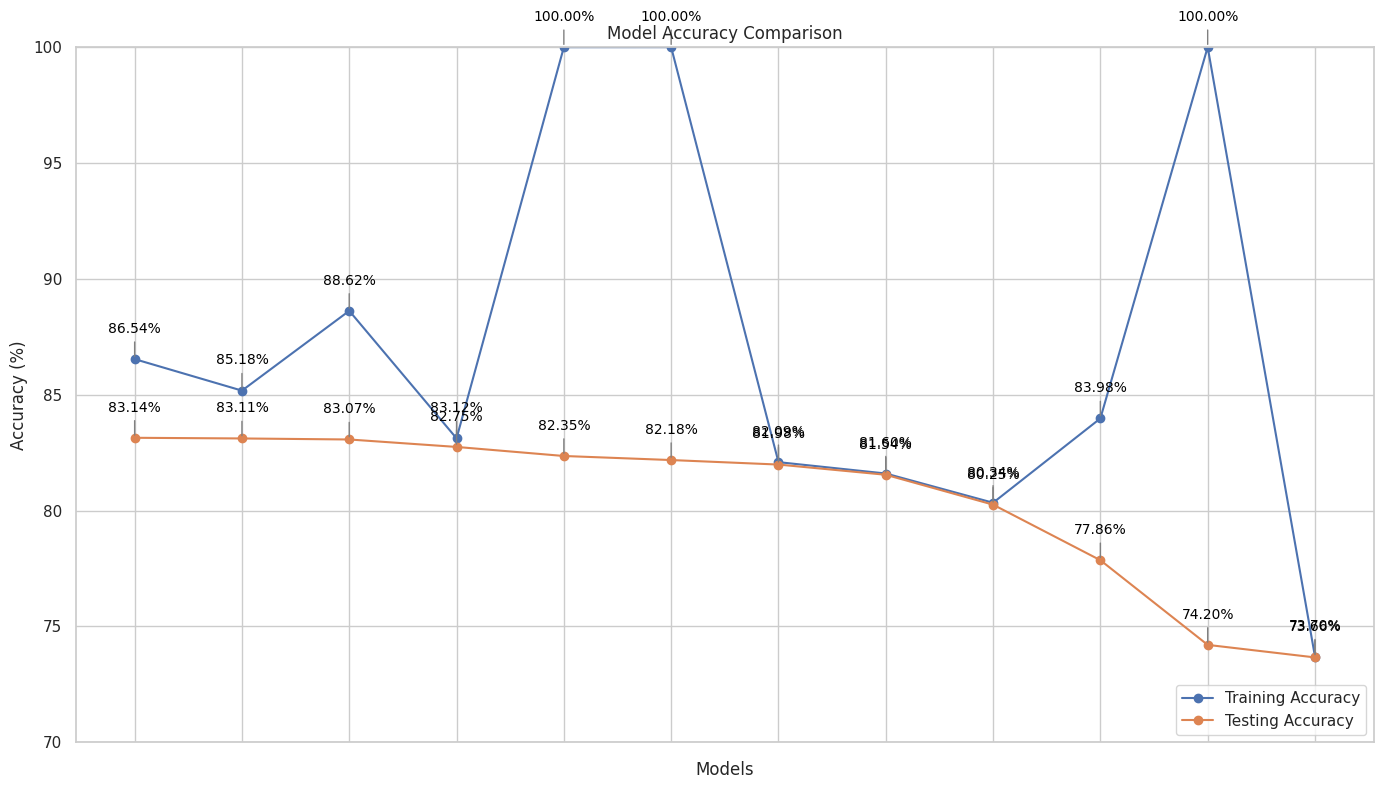

In [93]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(14, 8))
Acc_df.plot(x='Model', y=['Training_Accuracy', 'Testing_Accuracy'], marker='o', linestyle='-', ax=ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)

# Annotate training accuracy
for i, accuracy in enumerate(Acc_df['Training_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Annotate testing accuracy
for i, accuracy in enumerate(Acc_df['Testing_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Remove model names from x-axis
ax.set_xticks(range(len(Acc_df['Model'])))
ax.set_xticklabels([''] * len(ax.get_xticks()))

# Show the plot
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust layout to make room for the rotated x-axis labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()



# 6 | Hypertuning the selected model





## **1. Hypertung XGBoost**

In [94]:

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 6, 13)
    n_estimators = trial.suggest_int('n_estimators', 500, 5000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)

    print('Training the model with', x_train.shape[1], 'features')

    params = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eval_metric': 'mlogloss'
    }

    clf = XGBClassifier(**params,class_weight = class_weights_dict)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(clf, x, y, cv=5, scoring='accuracy')

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [95]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2024-12-09 07:23:50,723] A new study created in memory with name: no-name-2aff08c3-ea29-4ffc-a293-16fb3a7411af


Training the model with 39 features


[W 2024-12-09 07:24:06,432] Trial 0 failed with parameters: {'max_depth': 10, 'n_estimators': 2891, 'gamma': 0.8347448804768998, 'reg_alpha': 0.8611582966547909, 'reg_lambda': 0.9464421149697785, 'min_child_weight': 6, 'subsample': 0.5236090498368908, 'colsample_bytree': 0.7236036337962282, 'learning_rate': 0.03776490567846232} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-94-3391ed9a4b16>", line 30, in objective
    cv_results = cross_validate(clf, x, y, cv=5, scoring='accuracy')
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 423, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/d

KeyboardInterrupt: 

In [96]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

ValueError: No trials are completed yet.

In [97]:
best_params = {'max_depth': 6, 'n_estimators': 4937, 'gamma': 0.8644097106882519, 'reg_alpha': 0.4215206295140813, 'reg_lambda': 0.6203345757486959, 'min_child_weight': 9, 'subsample': 0.8694499955731673, 'colsample_bytree': 0.5841425315961482, 'learning_rate': 0.02302515234749565}
# 87.95804382669048 and 83.16572172702416

In [98]:
# Now you can use the best_params to train the final model
hypertuned_XGB_Model = XGBClassifier(**best_params, eval_metric='mlogloss', num_class=3)


------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5841425315961482, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.8644097106882519, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02302515234749565,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4937, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...) model on Training Data is: 88.01393108745046
Mean Accuracy_Score of XGBClassifier(base_score=N

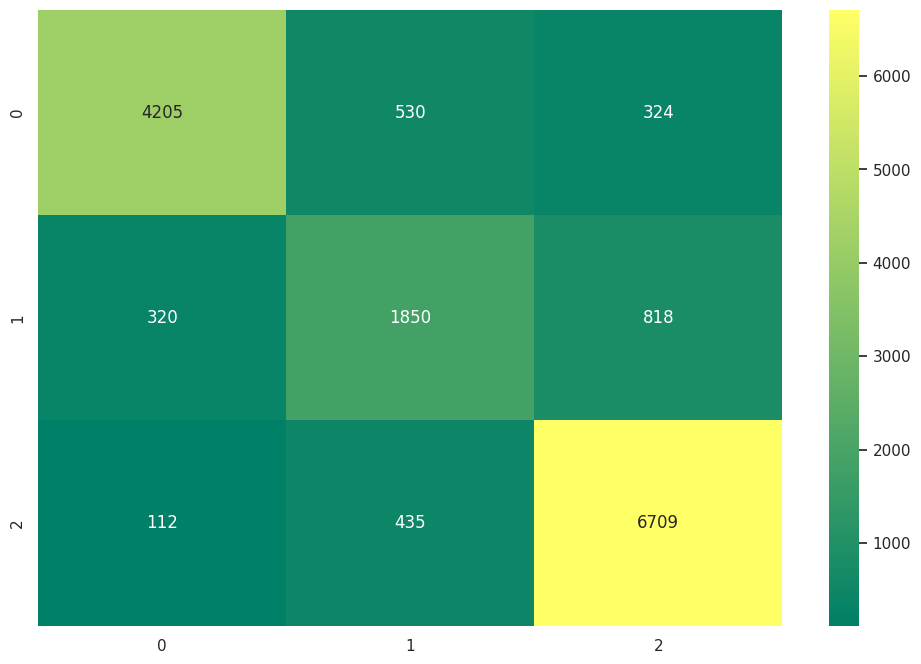

In [99]:
model_prediction(hypertuned_XGB_Model, x, y, n_splits=5, random_state=42)

In [118]:
y_pred = hypertuned_XGB_Model.predict(test_df)
y_pred = label_encoder.inverse_transform(y_pred)
submission = pd.DataFrame({"id": id, "Target": y_pred})
submission.to_csv("hypertuned_XGB_Model.csv", index=False)

In [ ]:
submission

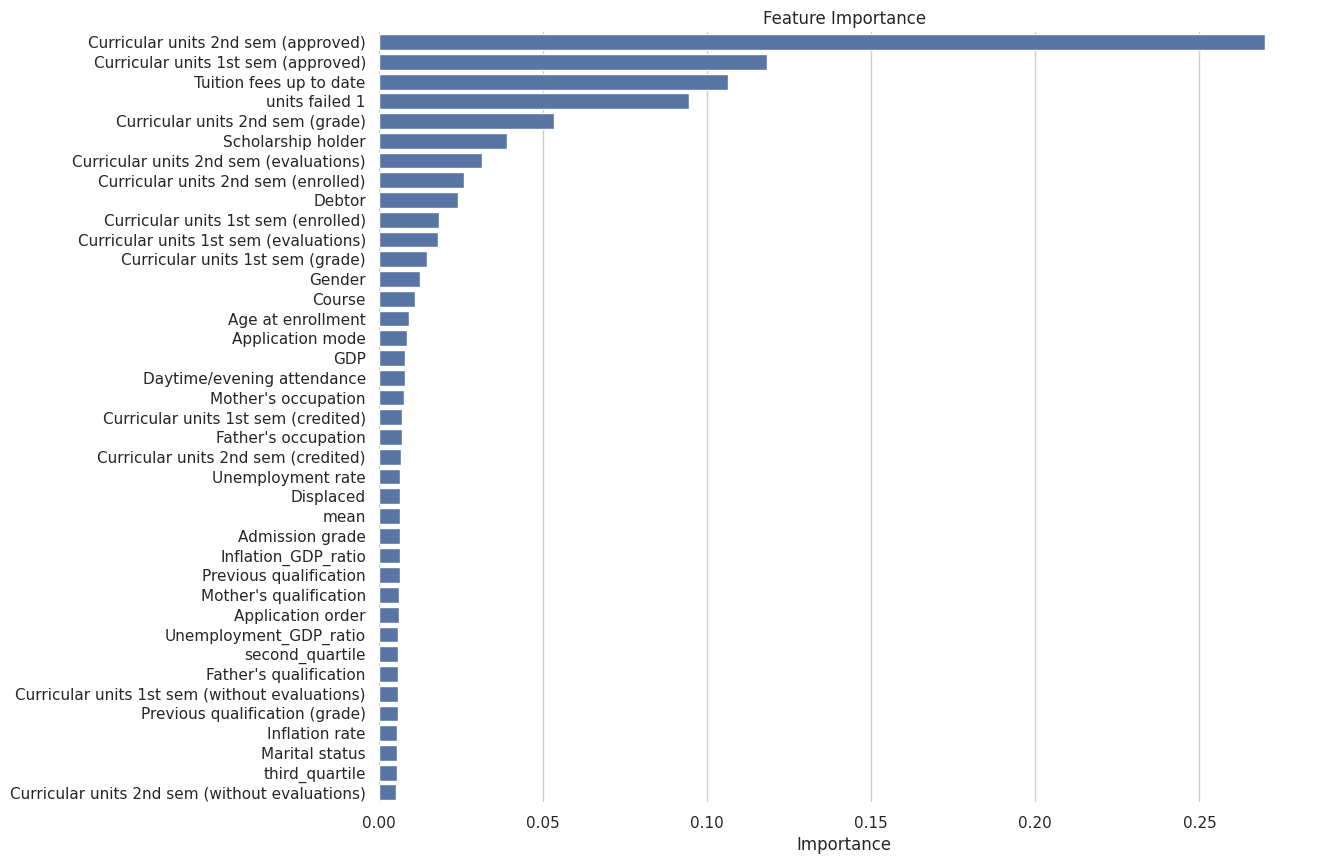

In [100]:
# feature importances
feature_importance = hypertuned_XGB_Model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **2. Hypertung Catboost**

In [101]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-2, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': 'Iter',
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Initialize the CatBoost classifier with hyperparameters
    clf = CatBoostClassifier(**param, verbose=0)

    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_results = cross_validate(clf, x, y, cv=cv, scoring='accuracy', n_jobs=-1, return_estimator=True)

    # Calculate the mean validation score
    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [ ]:
# Set up Optuna study
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=20)

In [ ]:
# Get the best hyperparameters
#best_params = study.best_params
#print("Best Hyperparameters :", best_params)

In [102]:
best_params = {'iterations': 713, 'depth': 6, 'learning_rate': 0.0966120526714887, 'l2_leaf_reg': 0.061010894132361757, 'border_count': 248, 'random_strength': 0.011241881636142037, 'bagging_temperature': 0.014862947689211698, 'od_wait': 22}

In [103]:
hypertuned_cb_model = CatBoostClassifier(**best_params)

0:	learn: 0.9929894	total: 71.4ms	remaining: 50.8s
1:	learn: 0.9122745	total: 123ms	remaining: 43.7s
2:	learn: 0.8473669	total: 175ms	remaining: 41.5s
3:	learn: 0.7950868	total: 235ms	remaining: 41.7s
4:	learn: 0.7511284	total: 290ms	remaining: 41s
5:	learn: 0.7148698	total: 340ms	remaining: 40.1s
6:	learn: 0.6838930	total: 391ms	remaining: 39.4s
7:	learn: 0.6572384	total: 443ms	remaining: 39.1s
8:	learn: 0.6341766	total: 497ms	remaining: 38.9s
9:	learn: 0.6144155	total: 549ms	remaining: 38.6s
10:	learn: 0.5971082	total: 603ms	remaining: 38.5s
11:	learn: 0.5820777	total: 655ms	remaining: 38.3s
12:	learn: 0.5689340	total: 711ms	remaining: 38.3s
13:	learn: 0.5572446	total: 761ms	remaining: 38s
14:	learn: 0.5470524	total: 811ms	remaining: 37.7s
15:	learn: 0.5376705	total: 875ms	remaining: 38.1s
16:	learn: 0.5293951	total: 935ms	remaining: 38.3s
17:	learn: 0.5222108	total: 987ms	remaining: 38.1s
18:	learn: 0.5157477	total: 1.04s	remaining: 37.9s
19:	learn: 0.5100001	total: 1.09s	remaining:

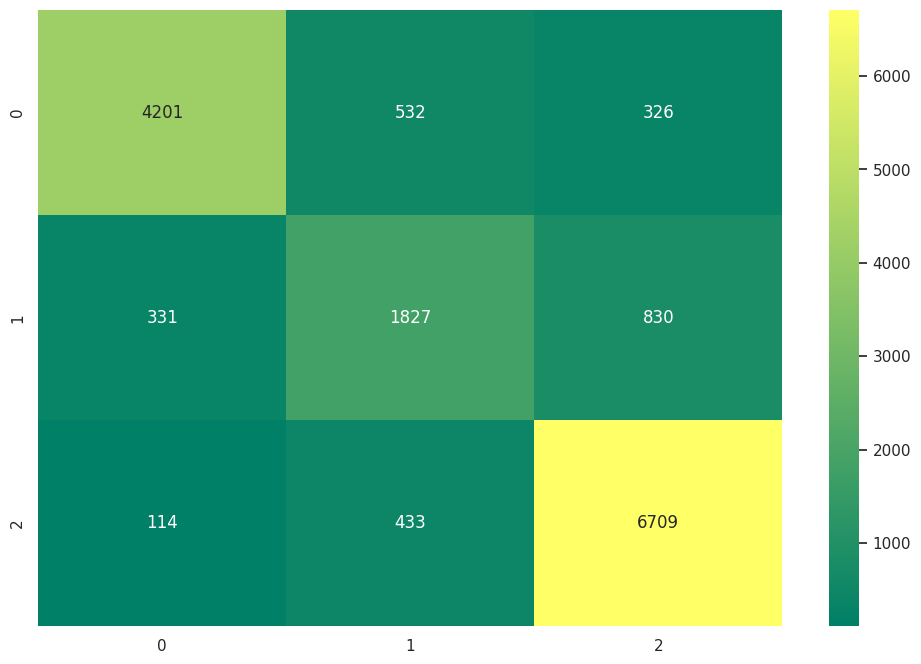

In [104]:
model_prediction(hypertuned_cb_model, x, y, n_splits=5, random_state=42)

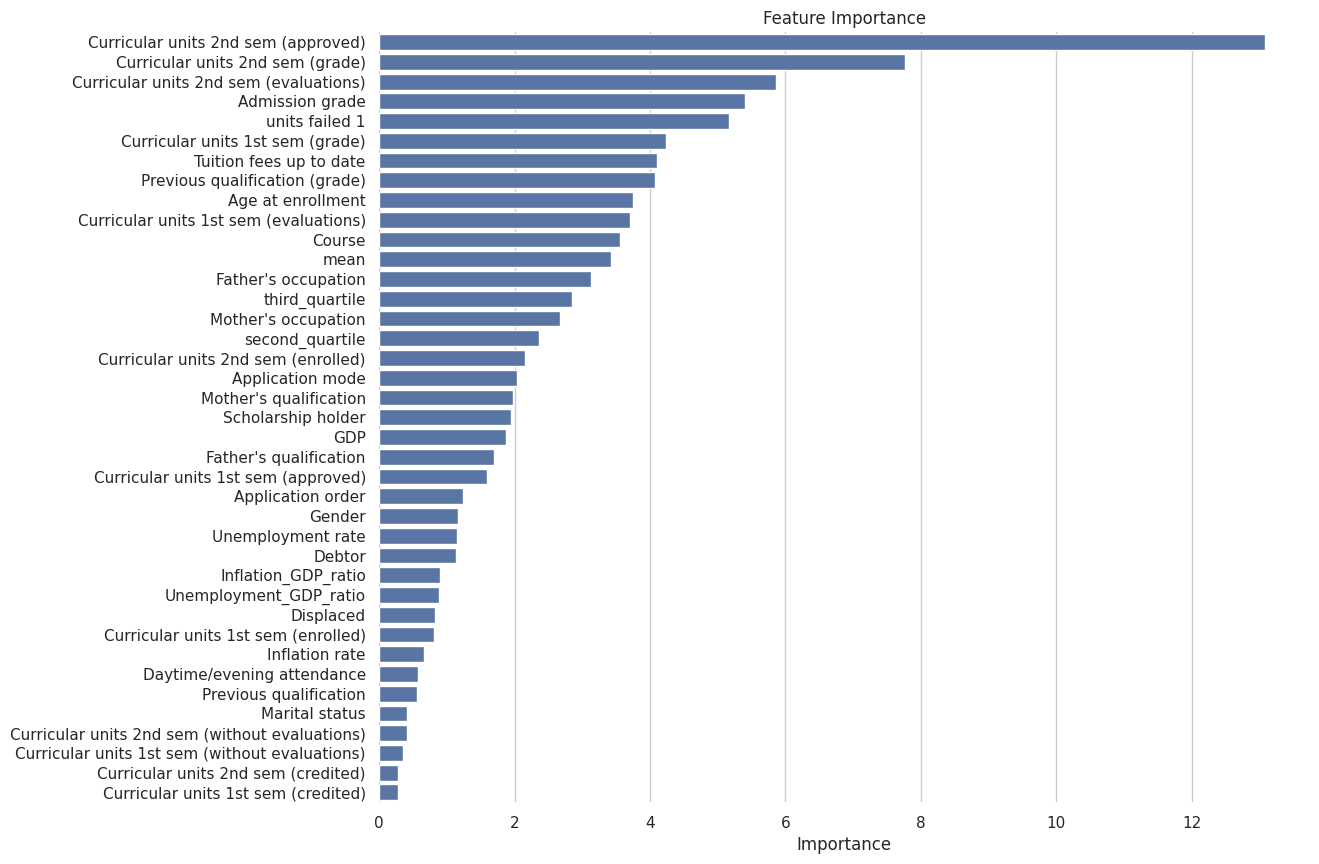

In [105]:
# feature importances
feature_importance = hypertuned_cb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **3. Hypertung LGBM**

In [106]:
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15)
    }


    clf = LGBMClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(clf, x, y, cv=cv, scoring='accuracy', n_jobs=-1)

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [ ]:
# Set up Optuna study
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=200)

In [ ]:
# Get the best hyperparameters
#best_params = study.best_params
#print("Best Hyperparameters for y:", best_params)

In [107]:
best_params = {
    'objective': 'multiclass',
    'boosting_type': 'goss',  # Gradient-based One-Side Sampling (GOSS)
    'tree_learner': 'feature',
    'n_estimators': 743,
    'learning_rate': 0.02636616162598401,
    'num_leaves': 699,
    'max_depth': 8,
    'colsample_bytree': 0.7975468653525116,
    'min_child_samples': 102,
    'min_data_in_leaf': 5,  # min_sum_hessian_in_leaf seems to be replaced with min_data_in_leaf in newer versions
    'min_split_gain': 0.7247318987185962,
    'max_bin': 156,
    'top_rate': 0.6132659772851583,
    'verbose': -1,
    'random_state': 42,
}
#Achieved train 88.68356334120548 and  test 83.13236452350763

In [108]:
hypertuned_LGBM_model = LGBMClassifier(**best_params)


------------------------------------------------------------------------
Mean Accuracy_Score of LGBMClassifier(boosting_type='goss', colsample_bytree=0.7975468653525116,
               learning_rate=0.02636616162598401, max_bin=156, max_depth=8,
               min_child_samples=102, min_data_in_leaf=5,
               min_split_gain=0.7247318987185962, n_estimators=743,
               num_leaves=699, objective='multiclass', random_state=42,
               top_rate=0.6132659772851583, tree_learner='feature', verbose=-1) model on Training Data is: 88.8212574436715
Mean Accuracy_Score of LGBMClassifier(boosting_type='goss', colsample_bytree=0.7975468653525116,
               learning_rate=0.02636616162598401, max_bin=156, max_depth=8,
               min_child_samples=102, min_data_in_leaf=5,
               min_split_gain=0.7247318987185962, n_estimators=743,
               num_leaves=699, objective='multiclass', random_state=42,
               top_rate=0.6132659772851583, tree_learner='fe

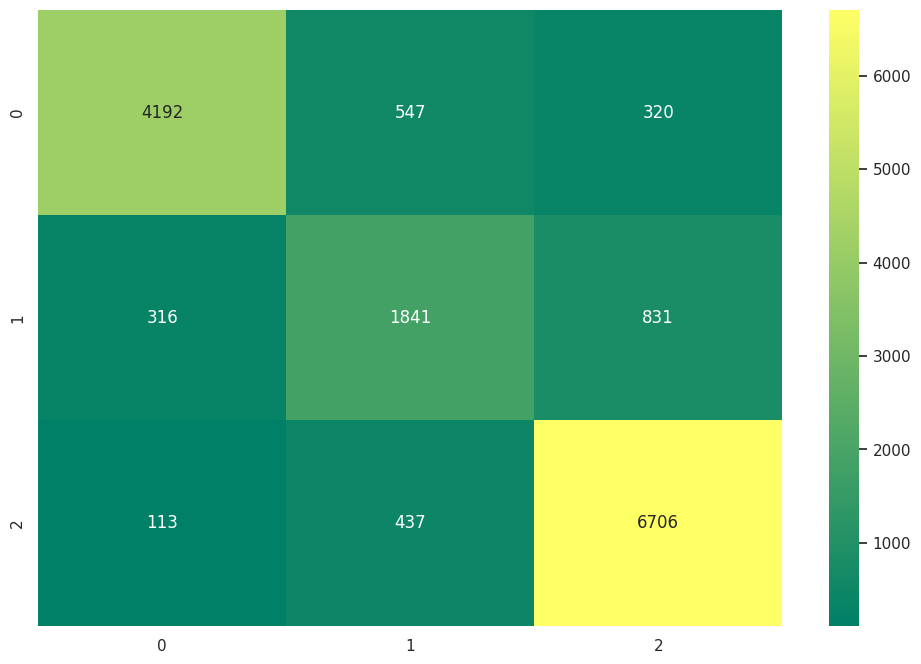

In [109]:
model_prediction(hypertuned_LGBM_model, x, y, n_splits=5, random_state=42)

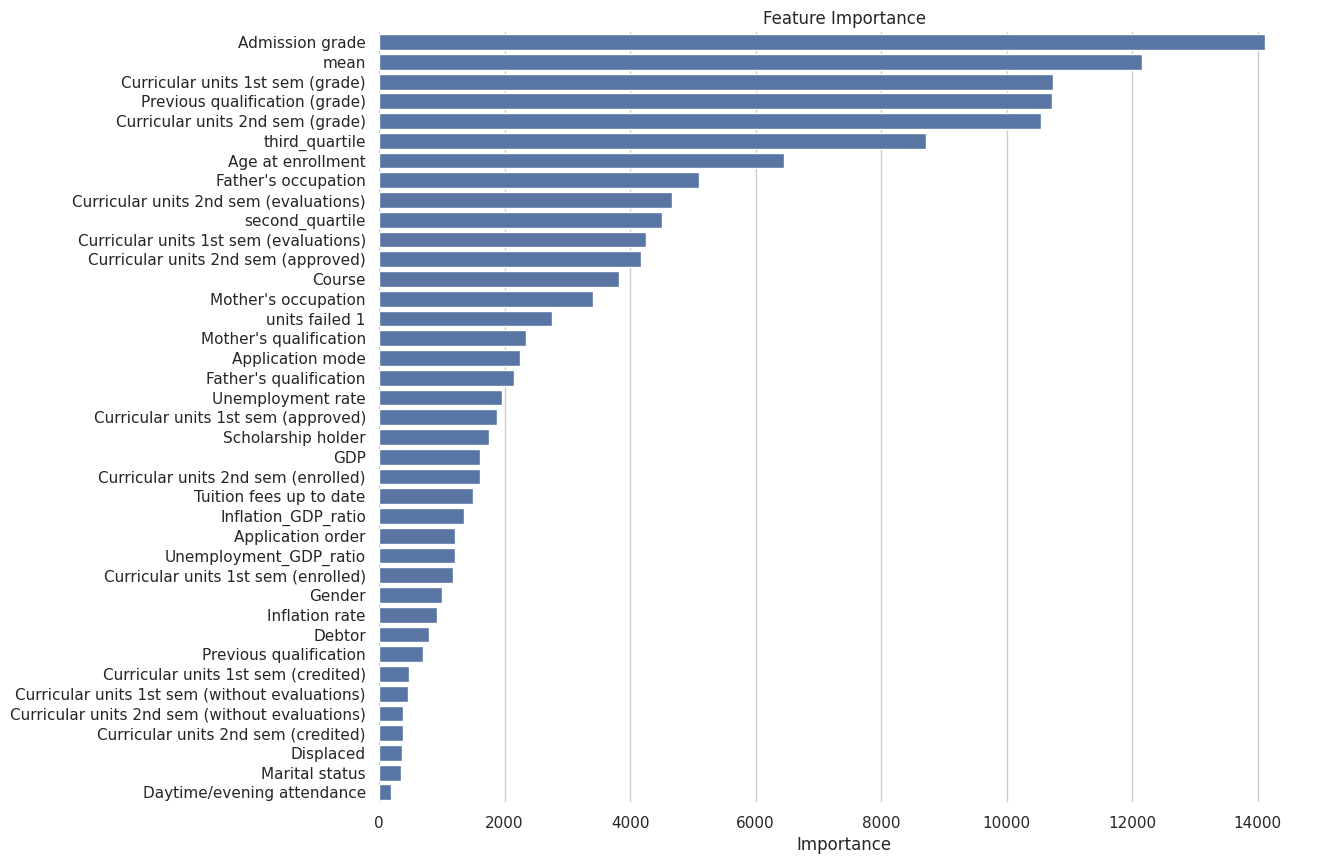

In [110]:
# feature importances
feature_importance = hypertuned_LGBM_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


## **Comparing Performance**

In [111]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM','hypertuned_XGB_Model','hypertuned_cb_model','hypertuned_LGBM_model'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [112]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0    hypertuned_XGB_Model          88.013931         83.332024
1   hypertuned_LGBM_model          88.821257         83.197416
2     hypertuned_cb_model          87.570245         83.141220
3                 catbost          86.535521         83.139913
4                    LGBM          85.175383         83.111161
5                 XGBoost          88.619671         83.066726
6                  GBoost          83.116064         82.745236
7            RandomForest          99.999020         82.354472
8    ExtraTree_Classifier         100.000000         82.179354
9                Adaboost          82.088854         81.984630
10    Logistic_Regression          81.598447         81.544212
11          SGD_classifer          80.336328         80.254311
12                    KNN          83.976319         77.856191
13           DecisionTree         100.000000         74.202150
14            Naive_Bayes          73.697691         73.661111

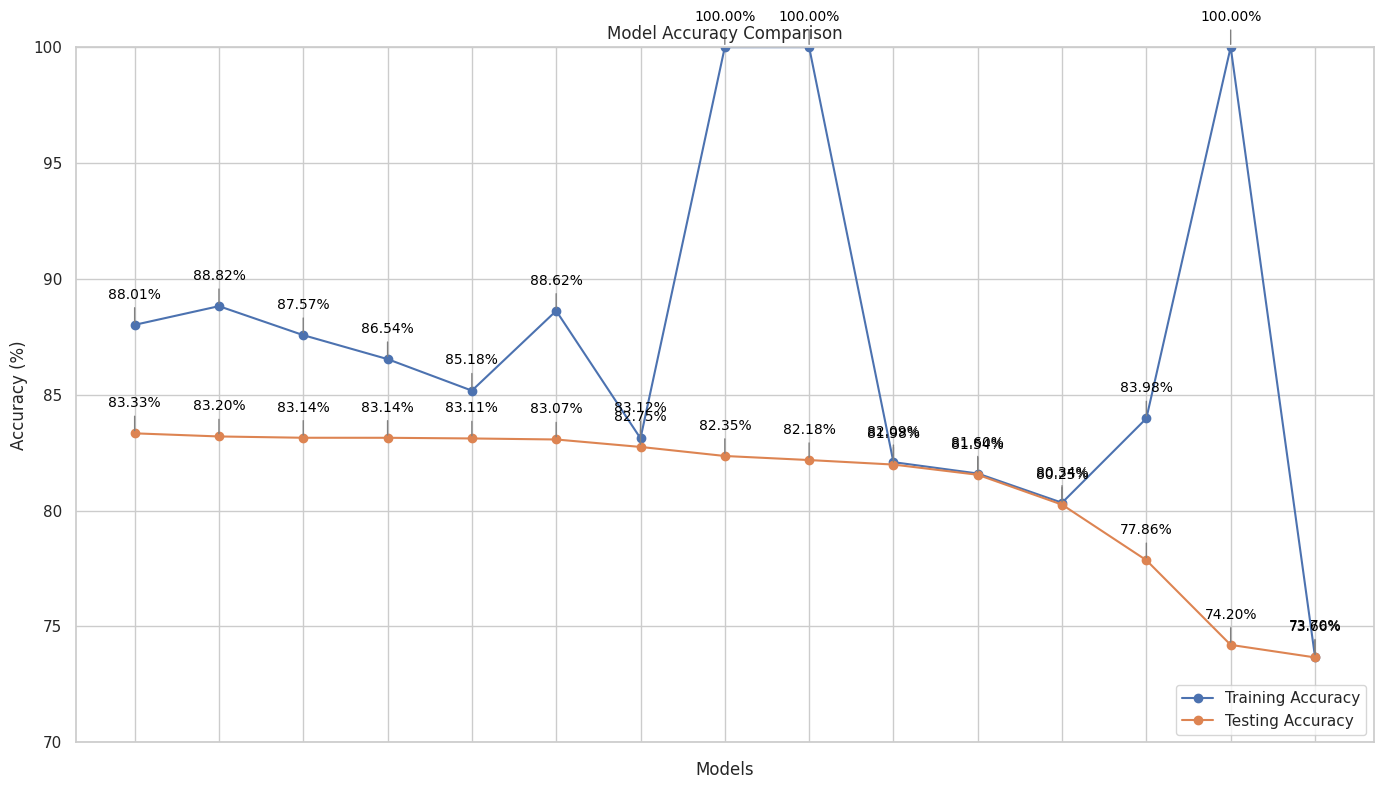

In [113]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(14, 8))
Acc_df.plot(x='Model', y=['Training_Accuracy', 'Testing_Accuracy'], marker='o', linestyle='-', ax=ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)

# Annotate training accuracy
for i, accuracy in enumerate(Acc_df['Training_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Annotate testing accuracy
for i, accuracy in enumerate(Acc_df['Testing_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Remove model names from x-axis
ax.set_xticks(range(len(Acc_df['Model'])))
ax.set_xticklabels([''] * len(ax.get_xticks()))

# Show the plot
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust layout to make room for the rotated x-axis labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


<a id='7'></a>
# 7 | Model Blending

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='7.1'></a>
## **1. Stacking Classifier (XGB+LGBM)**

In [114]:
# Define the list of estimators
estimators = [('xgb', hypertuned_XGB_Model),('lgbm', hypertuned_LGBM_model)]

# Initialize the StackingClassifier with Random Forest as final estimator
stacking_xgb_lgbm = StackingClassifier(estimators=estimators,final_estimator=LGBMClassifier(), passthrough=True)

In [115]:
stacking_xgb_lgbm

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5841425315961482,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              gamma=0.8644097106882519,
                                              grow_policy=None,
                                              importance_type=None,
                                              inte...
                                               colsample_bytree=0.7975468653525116,
                                               learning_rate=0.02636616162598401,
                                               max_bin=156, max_depth=8,
                                               min_child_samples=102,
                                               min_data_in_leaf=5,
                                               min_split_gain=0.7247318987185962,
                                               n_estimators=743, num_leaves=699,
                                               objective='multiclass',
                                               random_state=42,
                                               top_rate=0.6132659772851583,
                                               tree_learner='feature',
                                               verbose=-1))],
                   final_estimator=LGBMClassifier(), passthrough=True)


------------------------------------------------------------------------
Mean Accuracy_Score of StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5841425315961482,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              gamma=0.8644097106882519,
                                              grow_policy=None,
                          

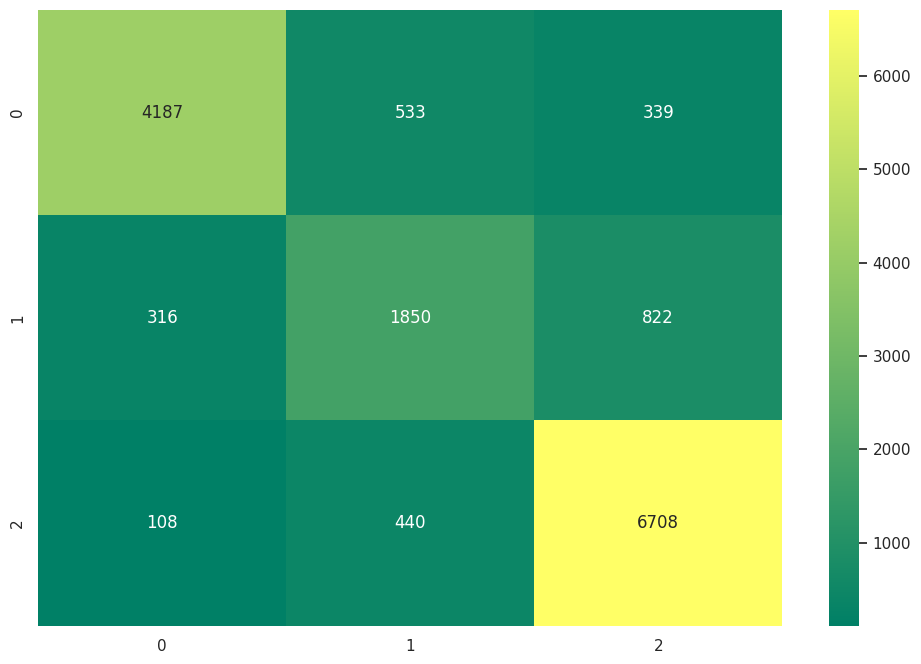

In [116]:
# Fit the stacking classifier on the training data
model_prediction(stacking_xgb_lgbm, x, y, n_splits=5, random_state=42)

In [119]:
y_pred = stacking_xgb_lgbm.predict(test_df)
y_pred = label_encoder.inverse_transform(y_pred)
submission = pd.DataFrame({"id": id, "Target": y_pred})
submission.to_csv("stacking_xgb_lgbm.csv", index=False)

<a id='7.2'></a>
## **2. Stacking Classifier (Catboost+XGB)**

In [117]:
# Define the list of estimators
estimators = [('catboost', hypertuned_cb_model),('xgb', hypertuned_XGB_Model)]

# Initialize the StackingClassifier with Random Forest as final estimator
stacking_cat_xgb = StackingClassifier(estimators=estimators,final_estimator=LGBMClassifier(),passthrough=True)

In [120]:
stacking_cat_xgb

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7d0168027370>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5841425315961482,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=No...
                                              interaction_constraints=None,
                                              learning_rate=0.02302515234749565,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=9, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=4937, n_jobs=None,
                                              num_class=3,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LGBMClassifier(), passthrough=True)

Выходные данные были обрезаны до нескольких последних строк (5000).
196:	learn: 0.4013891	total: 9.25s	remaining: 24.2s
197:	learn: 0.4012249	total: 9.28s	remaining: 24.1s
198:	learn: 0.4011294	total: 9.31s	remaining: 24.1s
199:	learn: 0.4009039	total: 9.35s	remaining: 24s
200:	learn: 0.4006430	total: 9.39s	remaining: 23.9s
201:	learn: 0.4003775	total: 9.43s	remaining: 23.9s
202:	learn: 0.4001314	total: 9.48s	remaining: 23.8s
203:	learn: 0.3999427	total: 9.52s	remaining: 23.8s
204:	learn: 0.3996477	total: 9.56s	remaining: 23.7s
205:	learn: 0.3994874	total: 9.59s	remaining: 23.6s
206:	learn: 0.3992812	total: 9.62s	remaining: 23.5s
207:	learn: 0.3991337	total: 9.67s	remaining: 23.5s
208:	learn: 0.3988826	total: 9.71s	remaining: 23.4s
209:	learn: 0.3986436	total: 9.75s	remaining: 23.3s
210:	learn: 0.3985421	total: 9.78s	remaining: 23.3s
211:	learn: 0.3983953	total: 9.82s	remaining: 23.2s
212:	learn: 0.3980992	total: 9.86s	remaining: 23.1s
213:	learn: 0.3979165	total: 9.91s	remaining: 23.1

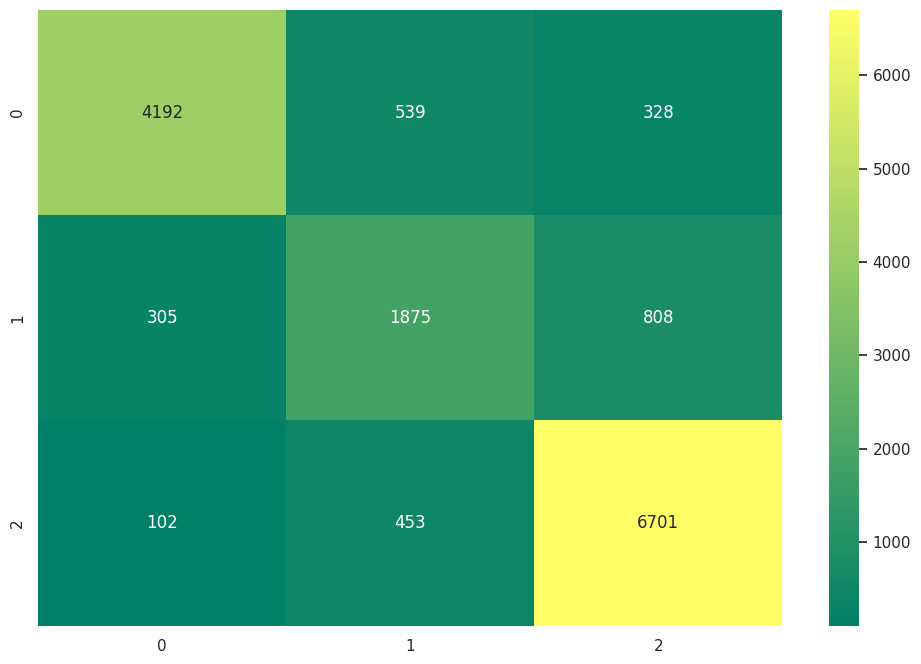

In [121]:
# Fit the stacking classifier on the training data
model_prediction(stacking_cat_xgb, x, y, n_splits=5, random_state=42)

<a id='7.3'></a>
## **3. Voting Ensemble**

In [122]:
# Train an Ensemble model using a combination of the GBoost and adaboost Classifiers
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', hypertuned_XGB_Model),
        ('stacking1', stacking_xgb_lgbm),
        ('stacking2',stacking_cat_xgb)
    ],
    voting='soft',
    flatten_transform=True
)

Выходные данные были обрезаны до нескольких последних строк (5000).
238:	learn: 0.3929143	total: 11.3s	remaining: 22.4s
239:	learn: 0.3926995	total: 11.4s	remaining: 22.5s
240:	learn: 0.3924859	total: 11.5s	remaining: 22.5s
241:	learn: 0.3923392	total: 11.6s	remaining: 22.5s
242:	learn: 0.3921438	total: 11.7s	remaining: 22.5s
243:	learn: 0.3918771	total: 11.7s	remaining: 22.5s
244:	learn: 0.3916509	total: 11.8s	remaining: 22.6s
245:	learn: 0.3913573	total: 11.9s	remaining: 22.6s
246:	learn: 0.3912036	total: 12s	remaining: 22.6s
247:	learn: 0.3910522	total: 12s	remaining: 22.5s
248:	learn: 0.3909056	total: 12s	remaining: 22.4s
249:	learn: 0.3906859	total: 12.1s	remaining: 22.4s
250:	learn: 0.3904246	total: 12.1s	remaining: 22.3s
251:	learn: 0.3902314	total: 12.2s	remaining: 22.2s
252:	learn: 0.3900594	total: 12.2s	remaining: 22.2s
253:	learn: 0.3898303	total: 12.2s	remaining: 22.1s
254:	learn: 0.3896687	total: 12.3s	remaining: 22s
255:	learn: 0.3894362	total: 12.3s	remaining: 22s
256:	l

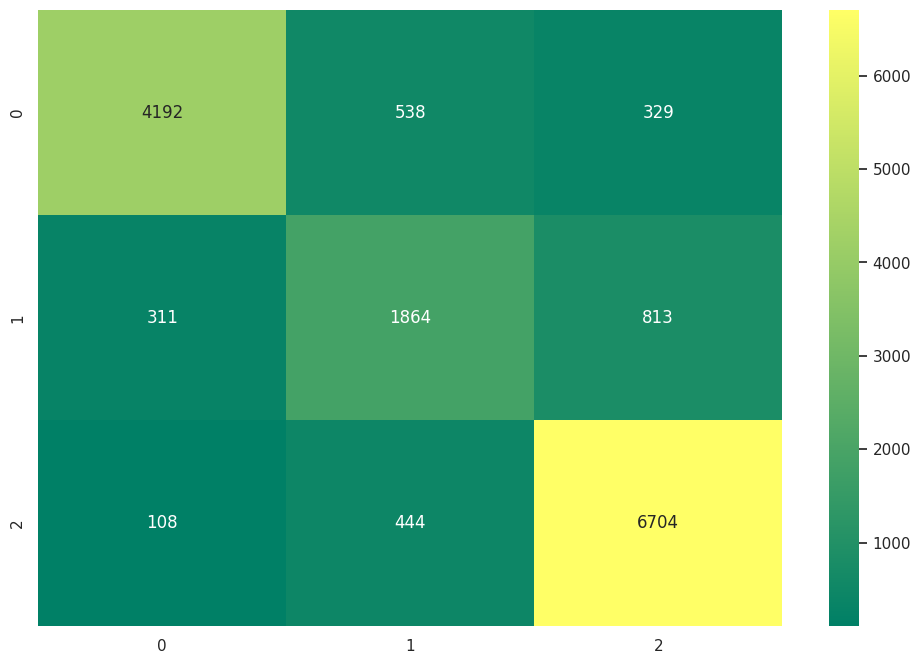

In [123]:
# Fit the stacking classifier on the training data
model_prediction(ensemble_model, x, y, n_splits=5, random_state=42)


## **Comparing Performance**

In [124]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM','hypertuned_XGB_Model','hypertuned_cb_model','hypertuned_LGBM_model','stacking_xgb_lgbm','stacking_cat_xgb','ensemble_model'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [125]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0    hypertuned_XGB_Model          88.013931         83.332024
1          ensemble_model          88.117828         83.267987
2        stacking_cat_xgb          87.902192         83.207872
3   hypertuned_LGBM_model          88.821257         83.197416
4       stacking_xgb_lgbm          88.257338         83.190880
5     hypertuned_cb_model          87.570245         83.141220
6                 catbost          86.535521         83.139913
7                    LGBM          85.175383         83.111161
8                 XGBoost          88.619671         83.066726
9                  GBoost          83.116064         82.745236
10           RandomForest          99.999020         82.354472
11   ExtraTree_Classifier         100.000000         82.179354
12               Adaboost          82.088854         81.984630
13    Logistic_Regression          81.598447         81.544212
14          SGD_classifer          80.336328         80.254311
15                    KNN          83.976319         77.856191
16           DecisionTree         100.000000         74.202150
17            Naive_Bayes          73.697691         73.661111

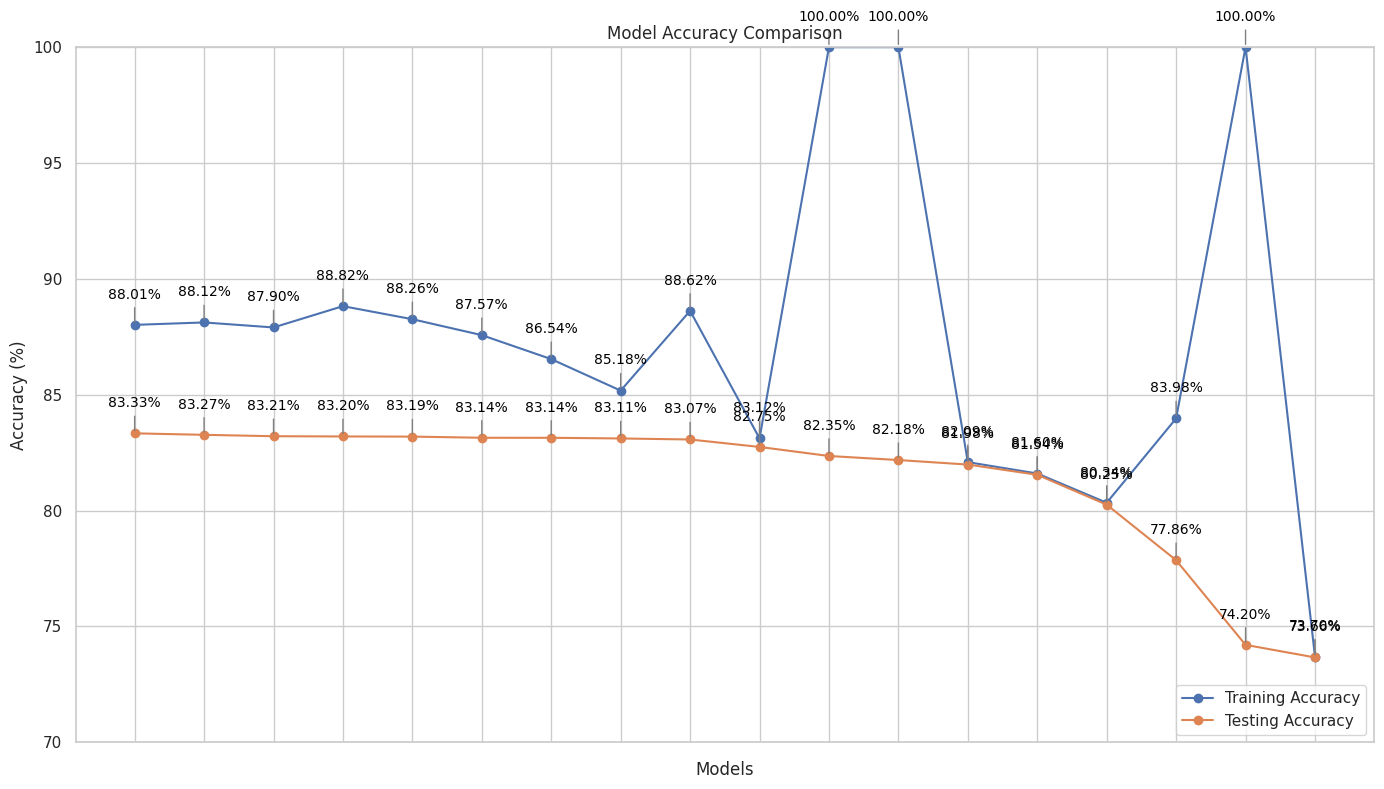

In [126]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(14, 8))
Acc_df.plot(x='Model', y=['Training_Accuracy', 'Testing_Accuracy'], marker='o', linestyle='-', ax=ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)

# Annotate training accuracy
for i, accuracy in enumerate(Acc_df['Training_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Annotate testing accuracy
for i, accuracy in enumerate(Acc_df['Testing_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Remove model names from x-axis
ax.set_xticks(range(len(Acc_df['Model'])))
ax.set_xticklabels([''] * len(ax.get_xticks()))

# Show the plot
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust layout to make room for the rotated x-axis labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()



# 8 | Preparing Submission



In [127]:
models_to_evaluate = [
    ("hypertuned_cb_model", hypertuned_cb_model),
    ("hypertuned_XGB_Model", hypertuned_XGB_Model),
    ("hypertuned_LGBM_model", hypertuned_LGBM_model),
    ("LGBM_model", LGBM_model),
    ("CatBoost_model", CatBoost_model),
    ("XGBClassifier_model", XGBClassifier_model),
    ("stacking_xgb_lgbm",stacking_xgb_lgbm),
    ("stacking_cat_xgb",stacking_cat_xgb),
    # ("ensemble_model",ensemble_model)
]
for model_name, model in models_to_evaluate:
    y_pred = model.predict(test_df)
    y_pred = label_encoder.inverse_transform(y_pred)
    submission = pd.DataFrame({"id": id, "Target": y_pred})
    submission.to_csv(f"{model_name}.csv", index=False)


In [128]:
models_to_evaluate = [ ("ensemble_model",ensemble_model)]
for model_name, model in models_to_evaluate:
    y_pred = model.predict(test_df)
    y_pred = label_encoder.inverse_transform(y_pred)
    submission = pd.DataFrame({"id": id, "Target": y_pred})
    submission.to_csv(f"{model_name}.csv", index=False)